In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def plot_impulse_response(system, num=None, unnormal=1.0):
    if isinstance(system, signal.lti):
        t, h = signal.impulse(system, N=num)
        t /= unnormal
    elif isinstance(system, signal.dlti):
        t, h = signal.dimpulse(system, n=num)
        h = h[0]
    else:
        raise Exception("System should be an instance of scipy.signal.lti of scipy.signal.dlti")

    if num is not None:
        t = t[:num]
        h = h[:num]

    plt.figure(figsize=(15, 8))
    plt.title('Impulse response', fontsize=15)

    if isinstance(system, signal.lti):
        plt.plot(t, h)
        plt.xlabel('Time', fontsize=15)
    else:
        plt.stem(t, h, use_line_collection=True)
        plt.xlabel('Samples', fontsize=15)

    plt.ylabel('Amplitude', fontsize=15)

    plt.grid()
    plt.show()


def plot_step_response(system, num=None, unnormal=1.0):
    if isinstance(system, signal.lti):
        t, h = signal.step(system, N=num)
        t /= unnormal
    elif isinstance(system, signal.dlti):
        t, h = signal.dstep(system, n=num)
        h = h[0]
    else:
        raise Exception("System should be an instance of scipy.signal.lti of scipy.signal.dlti")

    if num is not None:
        t = t[:num]
        h = h[:num]

    plt.figure(figsize=(15, 8))
    plt.title('Impulse response', fontsize=15)

    if isinstance(system, signal.lti):
        plt.plot(t, h)
        plt.xlabel('Time', fontsize=15)
    else:
        plt.stem(t, h, use_line_collection=True)
        plt.xlabel('Samples', fontsize=15)

    plt.ylabel('Amplitude', fontsize=15)

    plt.grid()
    plt.show()

    
def plot_frequency_response(system,
                            passband=None, stopband=None,
                            ripple=None, attenuation=None,
                            bottom=None, top=None, left=None, right=None,
                            fs=1.0, unnormal=1.0):
    if isinstance(system, signal.lti):
        f, magnitude, phase = signal.bode(system)
        f *= unnormal
        if passband is not None:
            passband = passband * unnormal
        if stopband is not None:
            stopband = stopband * unnormal
    elif isinstance(system, signal.dlti):
        f, magnitude, phase = signal.dbode(system)
        f = f / np.pi
        if passband is not None:
            passband = passband / (fs / 2)
        if stopband is not None:
            stopband = stopband / (fs / 2)
        if left is not None:
            left /= fs / 2
        if right is not None:
            right /= fs / 2
    else:
        raise Exception("System should be an instance of scipy.signal.lti of scipy.signal.dlti")

    # normalize all


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    legend = False
    ax1.set_title('Magnitude response', fontsize=15)
    if passband is not None:
        first = True
        for p in passband:
            if first:
                ax1.axvline(p, color='g', label='passband')
                first = False
            else:
                ax1.axvline(p, color='g')
        legend = True
    if stopband is not None:
        first = True
        for s in stopband:
            if first:
                ax1.axvline(s, color='r', label='stopband')
                first = False
            else:
                ax1.axvline(s, color='r')
        legend = True
    if ripple is not None:
        ax1.axhline(ripple, color='darkblue', label='ripple')
        legend = True
    if attenuation is not None:
        ax1.axhline(attenuation, color='salmon', label='attenuation')
        legend = True
    if legend:
        ax1.plot(f, magnitude, label='Filter')
    else:
        ax1.plot(f, magnitude)
    ax1.set_ylabel('Magnitude [dB]', fontsize=15)
    if isinstance(system, signal.lti):
        ax1.set_xlabel(r'Frequency [Hz]', fontsize=15)
    else:
        ax1.set_xlabel(r'Normalized frequency ($\times \pi$ rad / samples)', fontsize=15)

    ax1.set_xlim(left=left, right=right)
    ax1.set_ylim(bottom=bottom, top=top)
    ax1.grid()
    if legend:
        ax1.legend()

    ax2.set_title('Phase response', fontsize=15)
    ax2.plot(f, phase)
    ax2.set_ylabel('Phase (degrees)', fontsize=15)
    if isinstance(system, signal.lti):
        ax2.set_xlabel(r'Frequency [Hz]', fontsize=15)
    else:
        ax2.set_xlabel(r'Normalized frequency ($\times \pi$ rad / samples)', fontsize=15)
    ax2.grid()

# Problem 1
A simple averaging filter is defined as  
$$Y[n] = (x[n – 1] + ... + x[n-N]) / N$$ 
a) Let $N = 7$. Determine the transfer function, its zeros and poles  
  
b) Determine a general form for zeros and poles for any $N$  
  
c) By comparing $y[n]$ and $y[n – 1]$ determine a recursive implementation  

## Solution (frequency-domain)
#### b) Determine a general form for zeros and poles for any $N$  
Impulse response $h(n)$ of a system is  
$$
h(n) = \left\{
\begin{array}{}
\frac{1}{N} & 1 \le n \le N\\
0 & otherwise\\
\end{array}
\right.
$$
So, transfer function in frequency-domain is $\large H(j\omega) = \sum\limits_{n=1}^{N} h[n] e^{-j\omega n} = -\frac{1}{N} \frac{1 - e^{-j\omega N}}{1 - e^{-j \omega}}$  
Let's find it's zeroes:  
$\large 1 - e^{-j\omega N} = 0 \Rightarrow 1 = e^{-j\omega N} \Rightarrow \omega_k N = 2\pi k \Rightarrow \omega_k = \frac{2\pi k}{N}$  
So it has $N$ zeros from $-\pi$ to $\pi$.     
Ans it's poles similary $\large \omega_k = 2\pi k$, so it has only one pole from $-\pi$ to $\pi$.    
  
#### a) Let $N = 7$. Determine the transfer function, its zeros and poles  

Specially, for an $N = 7$ the answer is:
- Transfer function $\large H(j\omega) = -\frac{1 - e^{-j\omega 7}}{1 - e^{-j \omega}}$
- Zeros: $\omega = \frac{2\pi}{7}$
- Poles: $\omega = 2\pi$  

## Solution (z-domain)
#### b) Determine a general form for zeros and poles for any $N$  
$y[n] = (x[n - 1] + \dots + x[n - N]) / N$  
$Y(z) = (X(z)z^{-1} + \dots + X(z)z^{-N}) / N$  
$\large H(z) = \frac{Y(z)}{X(z)} = \frac{z^{-1} + \ \dots \  + z^{-N}}{N} = \frac{z^{N-1} +  \ \dots \ + z + 1}{Nz^N} = \frac{z^N - 1}{N(z - 1)z^N}$  

- Zeros: $z^N - 1 = 0 \Rightarrow z = \sqrt[N]{1}$
- Poles: $(z - 1)z^N = 0 \Rightarrow z = 0$ or $z = 1$
#### a) Let $N = 7$. Determine the transfer function, its zeros and poles  
Specially, for an $N = 7$ the answer is:
- Transfer function $\large H(z) = \frac{z^7 - 1}{7(z - 1)z^7}$
- Zeros: $z = 0$; $z = 1$
- Poles: $z = \sqrt[7]{1}$
  
  
#### c) By comparing $y[n]$ and $y[n – 1]$ determine a recursive implementation  
$y[n] = (x[n - 1] + \dots + x[n - N]) / N$  
$y[n - 1] = (x[(n - 1) - 1] + \dots + x[(n - 1) - N]) / N$  
So the recursive implementation:  
$y[n] - y[n - 1] = x[n - 1]/N - x[n - 1 - N] / N \Rightarrow y[n] = y[n - 1] + x[n - 1]/N - x[n - 1 - N]/N$

# Problem2
A Digital Filter is defined by the difference equation
$$y[n]=0.5y[n-1]+0.5x[n]$$
The filter is clearly recursive. Determine the impulse response $h[n]$  
a) Is the filter stable?  
b) Is it Low Pass, Band Pass or High Pass ?

Plot impulse response and magnitude and phase response in Matlab. Provide Matlab code.

## Solution
Impulse response: $$
h(n) = \left\{
\begin{array}{}
2^{-n - 1} & n \ge 0\\
0 & otherwise\\
\end{array}
\right.
$$

Let's check it:
Obviously, for $n < 0$ $y[n] = 0.5y[n - 1] + 0.5x[n] = 0 + 0 = 0$  
For $n = 0$: $y[0] = 0.5y[- 1] + 0.5x[0] = 0.5 = 2^{-1}$  
For $n > 0$: $y[n] = 0.5y[n - 1] + 0.5x[n] = 0.5 \cdot 2^{-n} + 0 = 2^{-n - 1}$  
#### a) Is the filter stable?
$\large y[n] = \frac{1}{2} x[n] + \frac{1}{2} y[n - 1] = \frac{1}{2} x[n] + \frac{1}{4} x[n - 1] + \frac{1}{4} y[n - 2] = \sum\limits_{k = 0}^{\infty} \frac{1}{2^{k + 1}} x[n - k]$  
If we have some bounded input $|x[n]| < C$, then  
$\large |y[n]| = |\sum\limits_{k = 0}^{\infty} \frac{1}{2^{k + 1}} x[n - k]| \le \sum\limits_{k = 0}^{\infty} \frac{1}{2^{k + 1}} |x[n - k]| < \sum\limits_{k = 0}^{\infty} \frac{1}{2^{k + 1}} C = C$  

Simplier, if we suppose $|y[n]| < C$ for some n < N, then $|y[N]| = |0.5y[N - 1] + 0.5x[N]| \le 0.5|y[N - 1] + 0.5|x[N]| < C$  
  
We can use another definition: the discrete LTI system is stable if impulse response is summable.  
$\sum\limits_{n = -\infty}^{\infty} |h[n]| = \sum\limits_{n = 0}^{\infty} 2^{-n - 1} = 1$  

**So our filter is stable**

#### b) Is it Low Pass, Band Pass or High Pass ?
$$\large H(j \omega) = \sum\limits_{n = -\infty}^{\infty}h[n] e^{-j\omega n} = \sum\limits_{n = 0}^{\infty} 2^{-n -1} e^{-j\omega n} = \frac{1}{2} \cdot \frac{1 - 0}{1 - \frac{1}{2} e^{-j \omega}} = \frac{1}{2 - e^{-j \omega}}$$  
We can see, that this function has it maximum at $H(\omega = 0) = 1$ and decrises to $H(\omega = \pi) = \frac{1}{3}$, so it is a low-pass filter.  
This is also seen from a magnitude response below.  

#### Plot impulse response and magnitude and phase response 

In [2]:
num = [0.5, 0]
den = [1, -0.5]
system = signal.dlti(num, den)

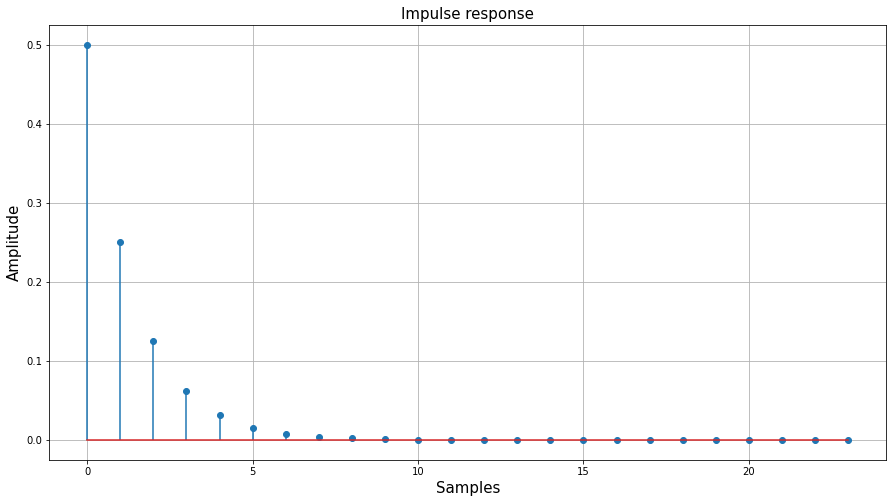

In [3]:
plot_impulse_response(system, 24)

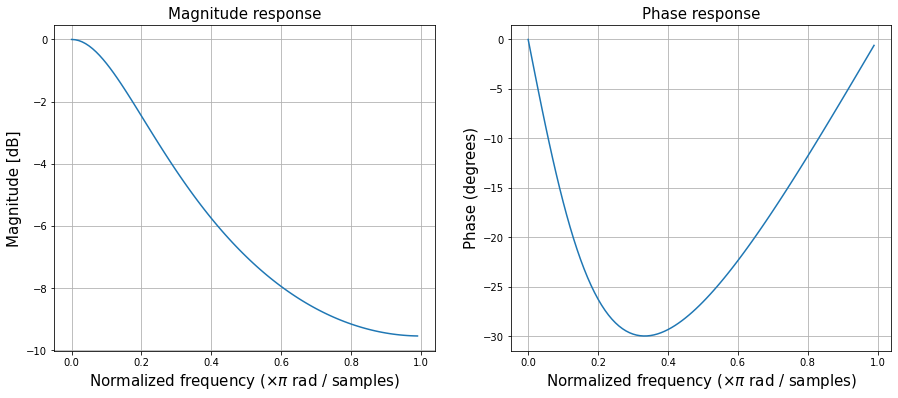

In [4]:
plot_frequency_response(system)

# Problem 3
a) Calculate z-transform of the following discrete-time signal:
$$x[n] = 7 (2/3)^n u[n] - 9 (1/4)^n u[n]$$
b) Find the system transfer function $H(z) = Y(z)/X(z)$ when the LTI system is described by the following difference equation:
$$y[n] = 0.5y[n - 1] + 0.4y[n - 2] + 0.3x[n - 1]$$
c) Calculate discrete-time signal from z-transform:
$$H(z) = \frac{z + 5}{(z - 2)(z + 3)}$$

## Solution
#### a) Calculate z-transform of the following discrete-time signal:
$$x[n] = 7 (2/3)^n u[n] - 9 (1/4)^n u[n]$$

We know, that for $x'[n] = a^nu[n]$ z-transform is $X(z) = \frac{1}{1 - az^{-1}}$ and the ROC is $|z| > |a|$  
So, for our $x[n]$:  
$\large X(z) = 7\frac{1}{1 - \frac{2}{3} z^{-1}} - 9 \frac{1}{1 - \frac{1}{4} z^{-1}} = \frac{21}{3 - 2z^{-1}} - \frac{36}{4 - z^{-1}}$

#### b) Find the system transfer function $H(z) = Y(z)/X(z)$ when the LTI system is described by the following difference equation:
$$y[n] = 0.5y[n - 1] + 0.4y[n - 2] + 0.3x[n - 1]$$
We can calculate it usung shifting preperty: $Z\{x[n - 1]\} = z^{-1} Z\{x[n]\}$  
So, we will have:  
$$Y(z) = 0.5z^{-1}Y(z) + 0.4 z^{-2} Y(z) + 0.3 z^{-1} X(z) \Rightarrow$$
$$\Rightarrow Y(z) - 0.5z^{-1}Y(z) - 0.4 z^{-2} Y(z) = 0.3 z^{-1} X(z) \Rightarrow$$
$$\Rightarrow Y(z) (1 -  0.5z^{-1}- 0.4 z^{-2}) = 0.3 z^{-1} X(z) \Rightarrow$$
$$\Rightarrow H(z) = \frac{Y(z)}{X(z)} = \frac{0.3 z^{-1}}{1 -  0.5z^{-1}- 0.4 z^{-2}}$$

#### c) Calculate discrete-time signal from z-transform:
$$H(z) = \frac{z + 5}{(z - 2)(z + 3)}$$
$\large H(z) = \frac{z + 5}{(z - 2)(z + 3)} = \frac{z^{-1}(1 + 5z^{-1})}{(1 - 2z^{-1})(1 + 3z^{-1})} = z^{-1}(\frac{7/5}{1 - 2z^{-1}} - \frac{2/5}{1 + 3z^{-1}})$  

As we know, $Z\{a^nu[n]\} = \frac{1}{1 - az^{-1}}$ and multiplying by $z^{-1}$ is just shifting, so:  
$\large h[n] = \frac{7}{5} 2^{n - 1} u[n - 1] - \frac{2}{5} (-3)^{n - 1} u[n - 1]$

# Problem 4
Design a bandpass filter to pass a signal within frequencies $8MHz$ and $10MHz$ with attenuation outside it not exceeding $60dB$, and $0.5dB$ ripple within the passband. Sampling frequency is $F_s = 34MHz$.  
a) Determine the impulse response of the filter  
b) Design the filter using the Hamming window  
c) Design the filter using the Chebyshev window  
Compare the two frequency and impulse responses. Provide Matlab code.  

## Solution
## FIR

In [5]:
fs = 34 * 10**6
passband = np.array([8 * 10**6, 10 * 10**6], dtype=np.float64)

attenuation = 60
ripple = 0.5
width = 1 * 10**6

passband /= fs
width /= fs

n = 122

filt = signal.remez(n, bands=[0, passband[0] - width, passband[0], passband[1], passband[1] + width, 0.5], desired=[0, 1, 0], fs=1)
filt = signal.dlti(filt, [1] + [0 for i in range(1, len(filt))])

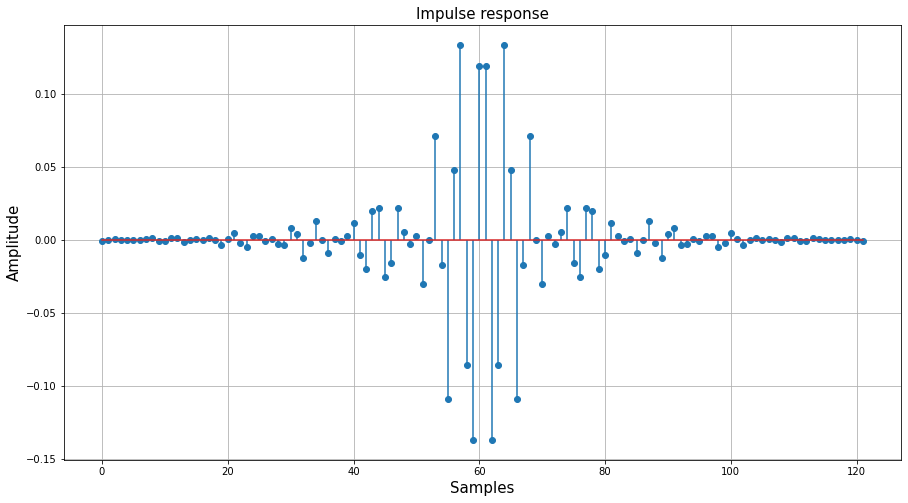

In [6]:
plot_impulse_response(filt, n)

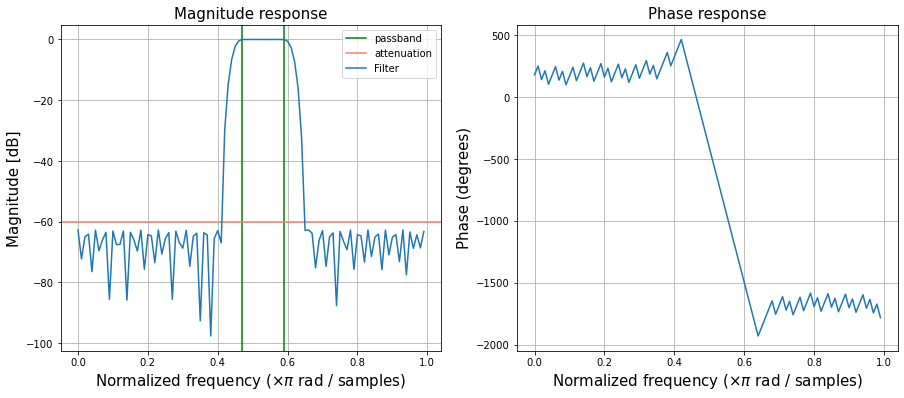

In [7]:
plot_frequency_response(filt, passband=passband, attenuation=-attenuation)

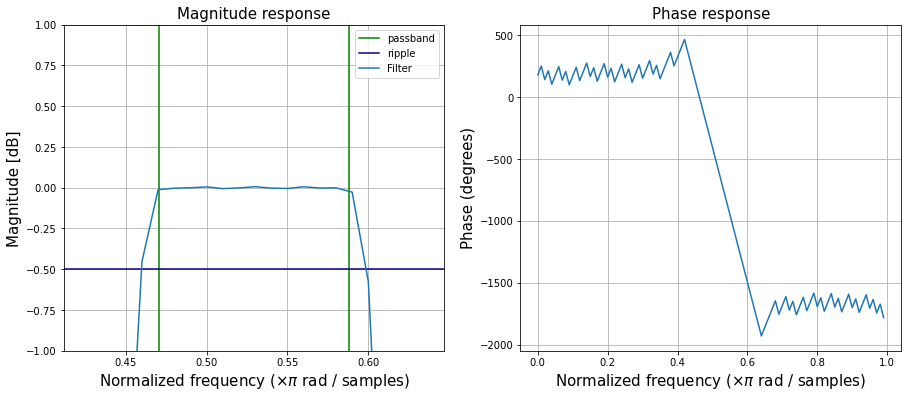

In [8]:
plot_frequency_response(filt, passband=passband, left=passband[0] - width, right=passband[1] + width, bottom=-1, top=1, ripple=-ripple)

# IIR

In [9]:
fs = 34 * 10**6

wp = np.array([8 * 10**6, 10 * 10**6], dtype=np.float64)
ws = np.array([7 * 10**6, 11 * 10**6], dtype=np.float64)

gpass = 0.5
gstop = 60

filt = signal.dlti(*signal.iirdesign(wp=wp, ws=ws, gpass=gpass, gstop=gstop, fs=fs))

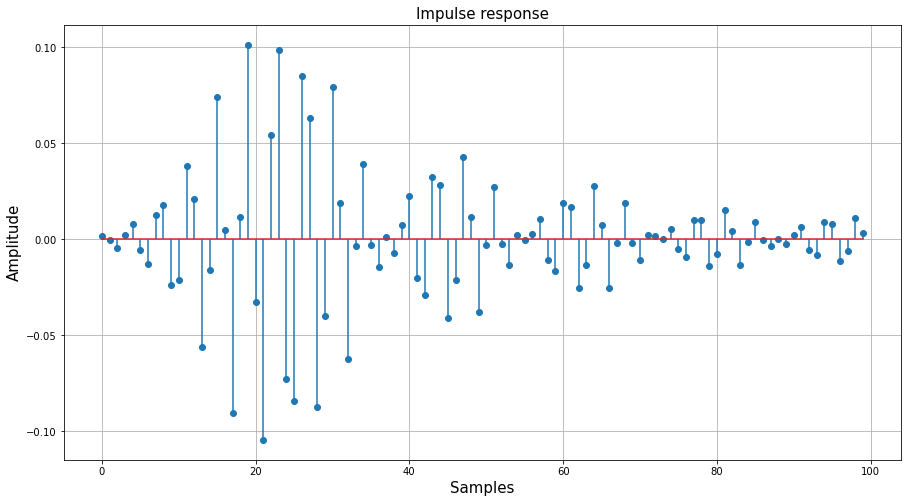

In [10]:
plot_impulse_response(filt)

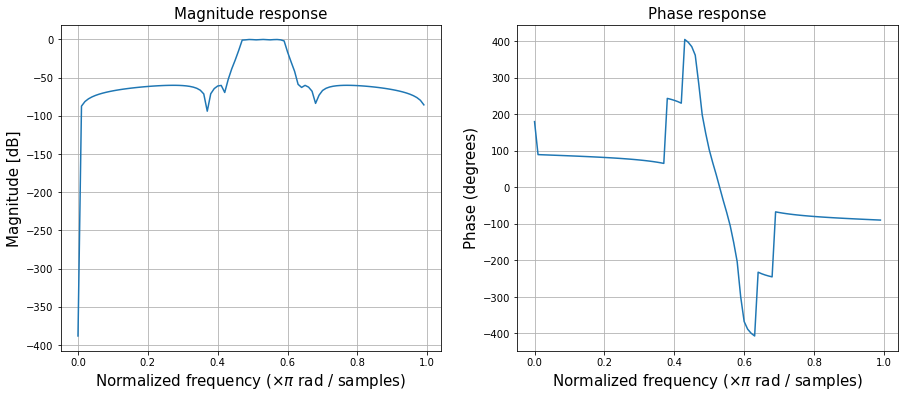

In [11]:
plot_frequency_response(filt, fs=fs)

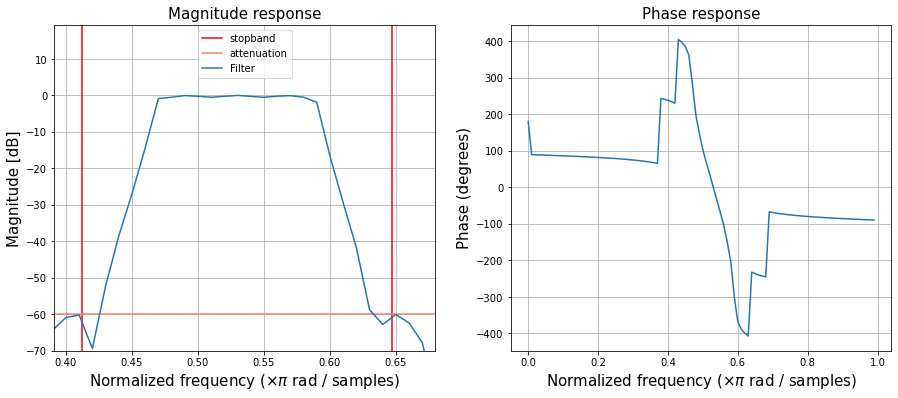

In [12]:
plot_frequency_response(filt, stopband=ws, attenuation=-gstop, bottom=-70, left=ws[0] * 0.95, right=ws[1] * 1.05, fs=fs)

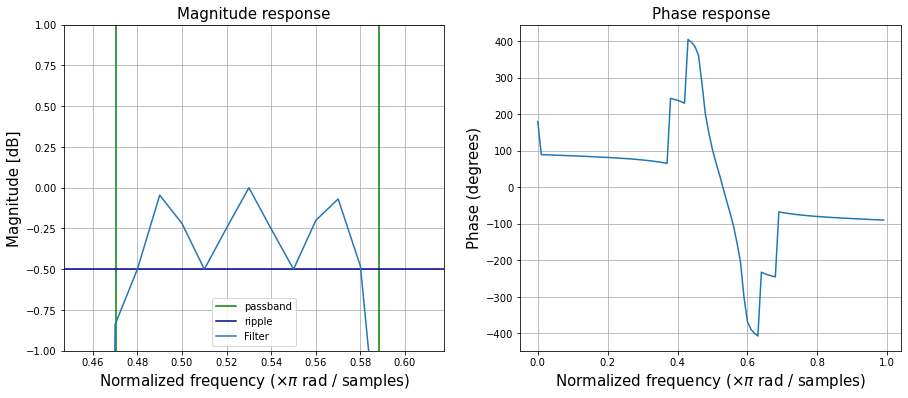

In [13]:
plot_frequency_response(filt, passband=wp, ripple=-gpass, bottom=-1, top=1, left=wp[0] * 0.95, right=wp[1] * 1.05, fs=fs)

#### b) Design the filter using the Hamming window  

In [14]:
n = 99
filt = signal.firwin(n, cutoff=passband, window='hamming', pass_zero=False, fs=1)
filt = signal.dlti(filt, [1] + [0 for i in range(1, len(filt))])

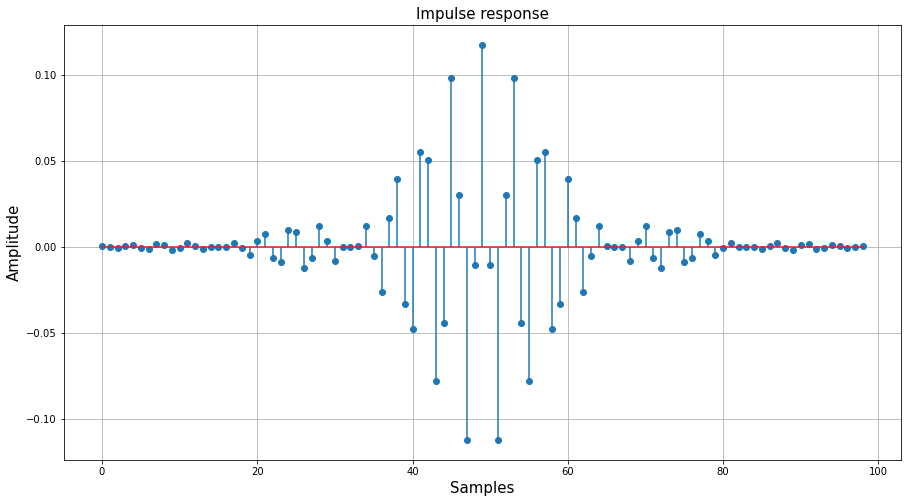

In [15]:
plot_impulse_response(filt, n)

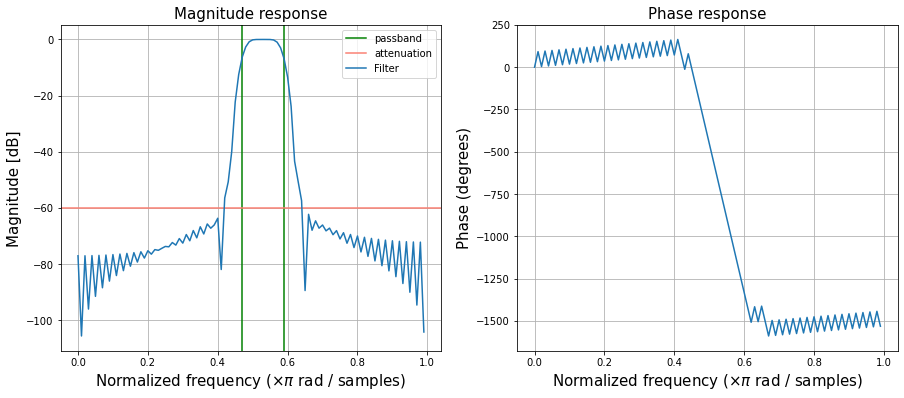

In [16]:
plot_frequency_response(filt, passband=passband, attenuation=-attenuation)

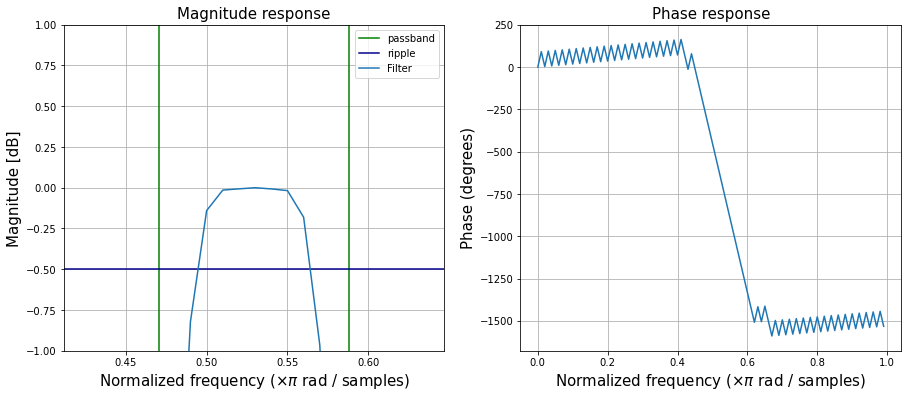

In [17]:
plot_frequency_response(filt, passband=passband, left=passband[0] - width, right=passband[1] + width, bottom=-1, top=1, ripple=-ripple)

#### c) Design the filter using the Chebyshev window  

In [18]:
n = 65
filt = signal.firwin(n, cutoff=passband, window=('chebwin', attenuation), pass_zero=False, fs=1)
filt = signal.dlti(filt, [1] + [0 for i in range(1, len(filt))])

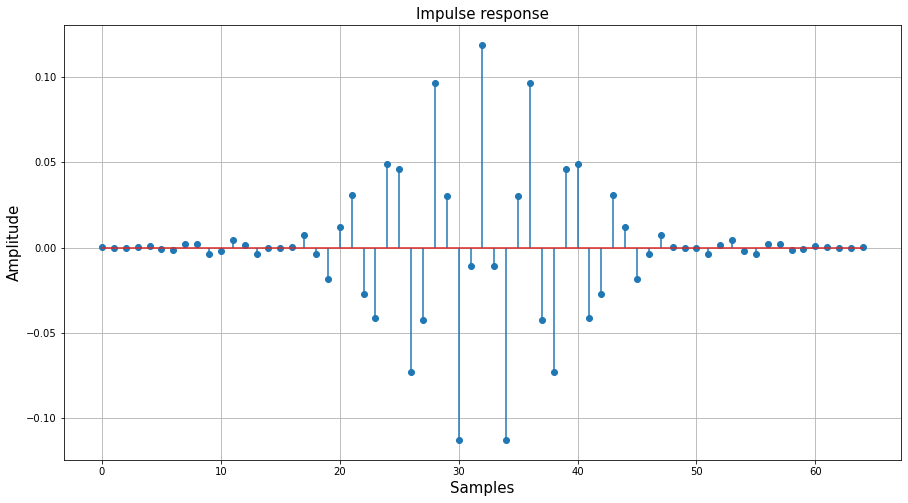

In [19]:
plot_impulse_response(filt, n)

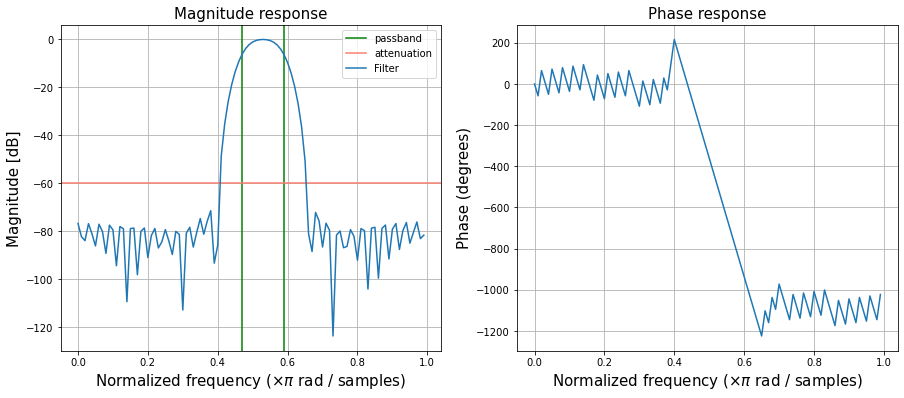

In [20]:
plot_frequency_response(filt, passband=passband, attenuation=-attenuation)

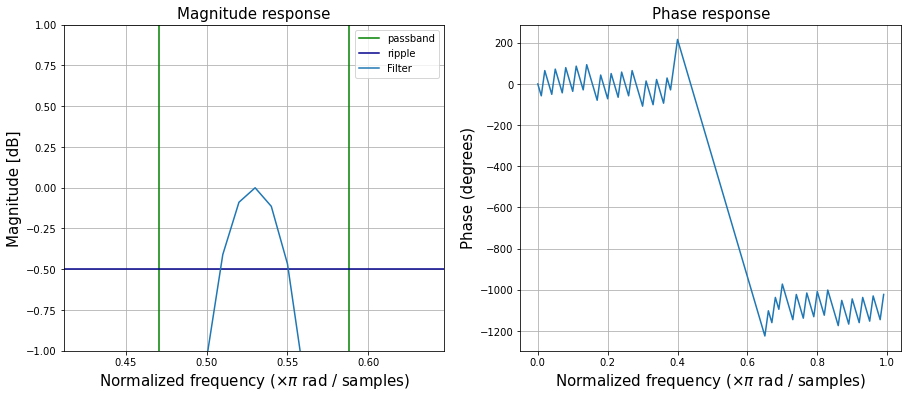

In [21]:
plot_frequency_response(filt, passband=passband, left=passband[0] - width, right=passband[1] + width, bottom=-1, top=1, ripple=-ripple)

# Problem 5
Design a low pass filter with passband $F_{pass} = 4 MHz$ and stopband $F_{stop} = 6MHz$, with attenuation of at least $60dB$. Let the sampling frequency be $F_s = 20MHz$. Using the techniques you know, determine the design with the least number of coefficients. Provide Matlab code.

In [22]:
fs = 20 * 10**6

wp = np.array([4 * 10**6])
ws = np.array([6 * 10**6])


gpass = 0.5
gstop = 60

In [23]:
for ftype in ['butter', 'cheby1', 'cheby2', 'ellip']:
    filt = signal.dlti(*signal.iirdesign(wp=wp, ws=ws, gpass=gpass, gstop=gstop, ftype=ftype, fs=fs))
    print(f'Number of coefficients for "{ftype}" type is equal to {len(filt.num) + len(filt.den)}')

Number of coefficients for "butter" type is equal to 28
Number of coefficients for "cheby1" type is equal to 16
Number of coefficients for "cheby2" type is equal to 16
Number of coefficients for "ellip" type is equal to 12


In [24]:
filt = signal.dlti(*signal.iirdesign(wp=wp, ws=ws, gpass=gpass, gstop=gstop, ftype='ellip', fs=fs))

As we can see, the "ellip" type is better, because it has only 12 coefficients.

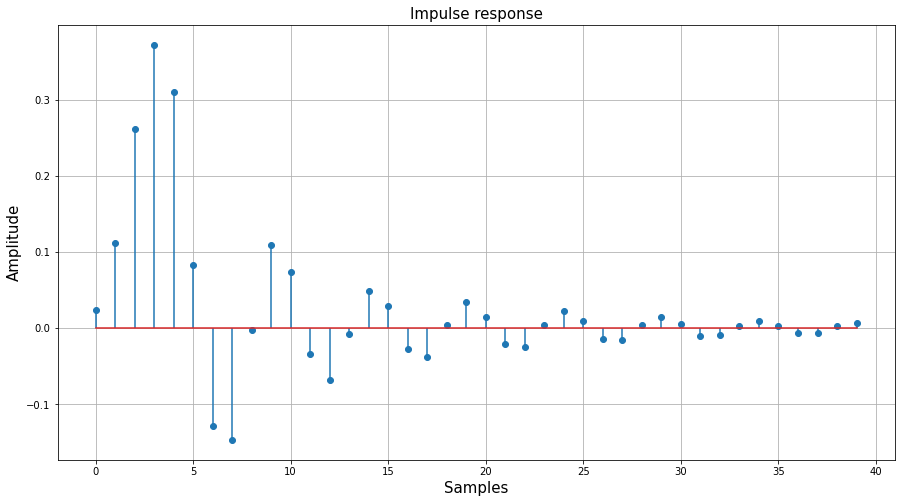

In [25]:
plot_impulse_response(filt, 40)

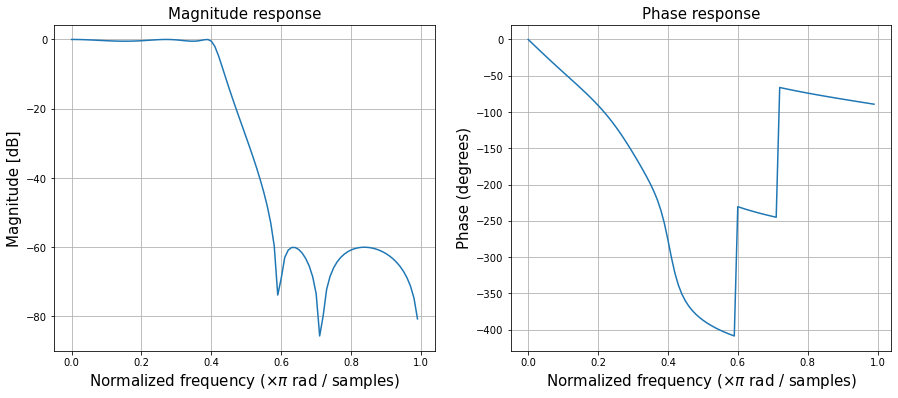

In [26]:
plot_frequency_response(filt)

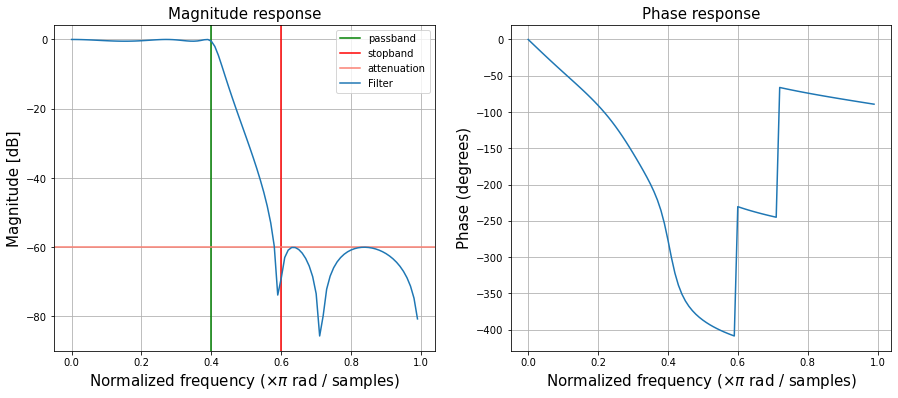

In [27]:
plot_frequency_response(filt, passband=wp, stopband=ws, attenuation=-gstop, fs=fs)

# Problem 6
Design a Low Pass FIR Filter with the following characteristics:  
Passband $10kHz$, Stopband $15kHz$, with attenuation of $60dB$, Sampling clock frequency $44kHz$  
Determine the causal impulse response $h[n]$, and an expression for the phase within the passband. Use one of the standard FIR windows with minimal number of samples. Plot magnitude response. Explain your choice.  
Do the same with firpm, firls, fir1 and fir2. Plot magnitude responses. Explain the difference between results. Provide Matlab code.

# Solution
For a original filter I am using and analyse **firwin** scipy function. 

Scipy has analogs of a matlab functions:
- matlab **firpm** -> scipy **remez**
- matlab **firls** -> scipy **firls**
- matlab **fir1**  -> scipy **firwin**
- matlab **fir2**  -> scipy **firwin2** (not just the same, but, according to description, is very similar)

In [28]:
fs = 44 * 10**3
passband = np.array([10 * 10**3])
stopband = np.array([15 * 10**3])

In [29]:
n = 29
filt = signal.firwin(numtaps=n, cutoff=passband, width=stopband - passband, pass_zero='lowpass', fs=fs)
filt = signal.dlti(filt, [1] + [0 for i in range(1, len(filt))])

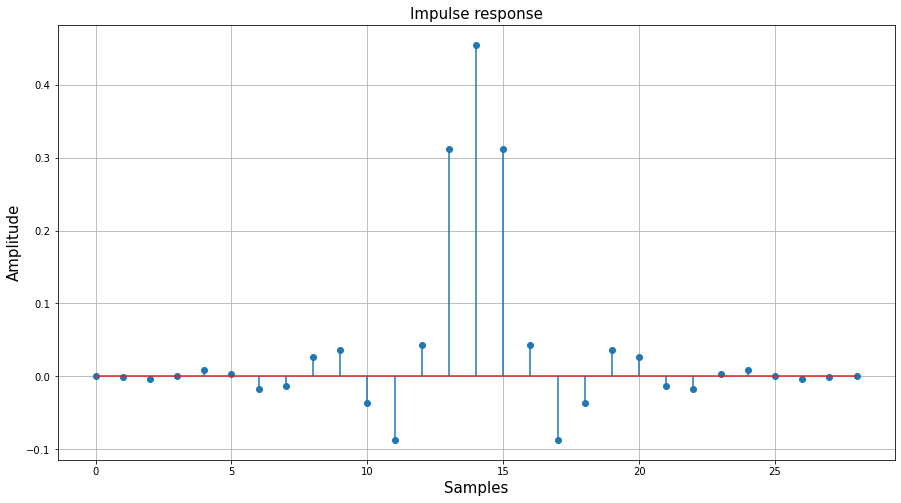

In [30]:
plot_impulse_response(filt, 29)

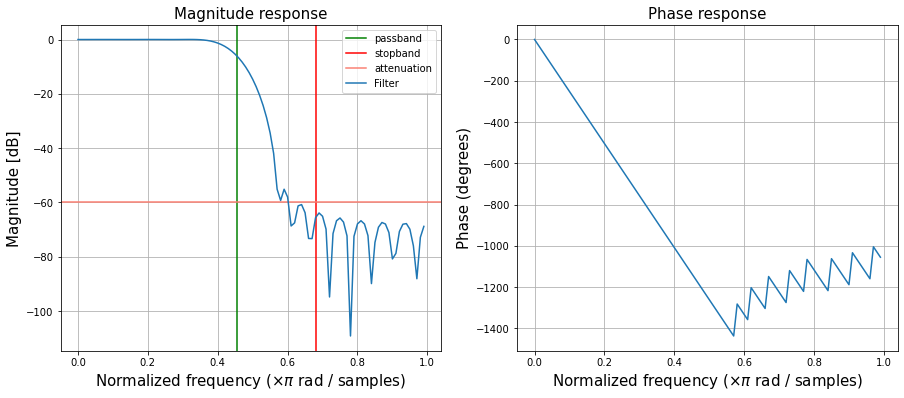

In [31]:
plot_frequency_response(filt, passband=passband, stopband=stopband, attenuation=-60, fs=fs)

In [32]:
f, _, phase = signal.dbode(filt)
print(f'Coefficient = {(phase[50] - phase[0]) / (f[50] - f[0])}')

Coefficient = -802.1409131831525


As we can see from the plot, the phase is linear of frequency with coefficient $\approx$ -800.

### firpm

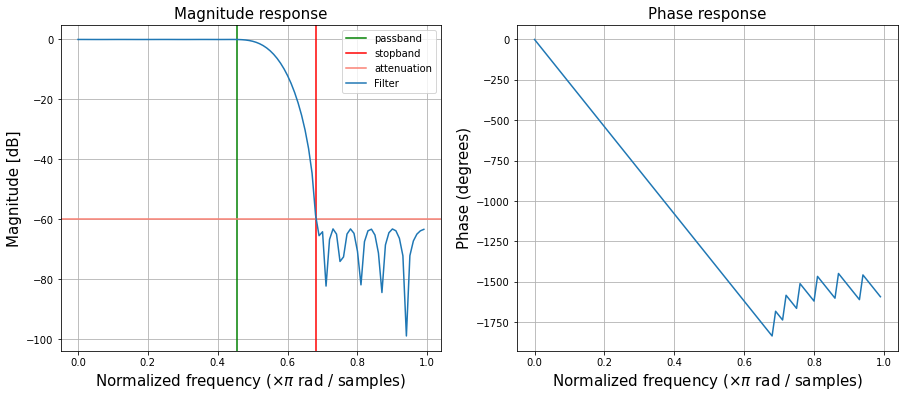

In [33]:
n = 31
firpm = signal.remez(n, bands=[0, passband[0], stopband[0], fs / 2], desired=[1, 0], fs=fs)
firpm = signal.dlti(firpm, [1] + [0 for i in range(1, len(firpm))])
plot_frequency_response(firpm, passband=passband, stopband=stopband, attenuation=-60, fs=fs)

### firls

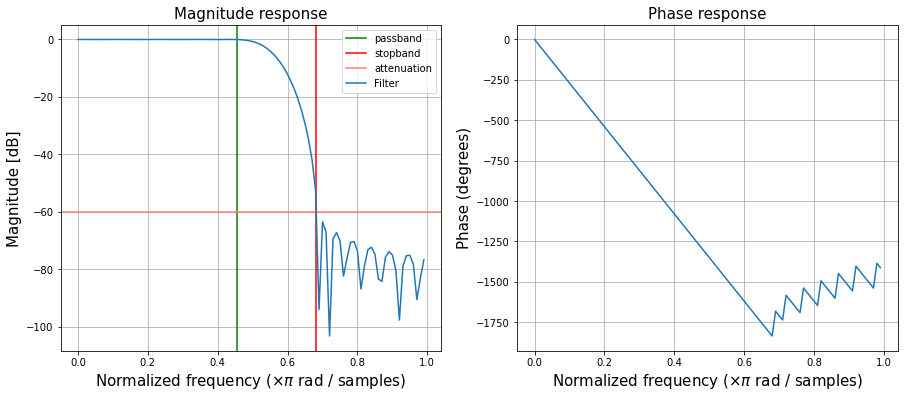

In [34]:
n = 31
firls = signal.firls(n, bands=[0, passband[0], stopband[0], fs / 2], desired=[1, 1, 0, 0], fs=fs)
firls = signal.dlti(firls, [1] + [0 for i in range(1, len(firls))])
plot_frequency_response(firls, passband=passband, stopband=stopband, attenuation=-60, fs=fs)

### fir1

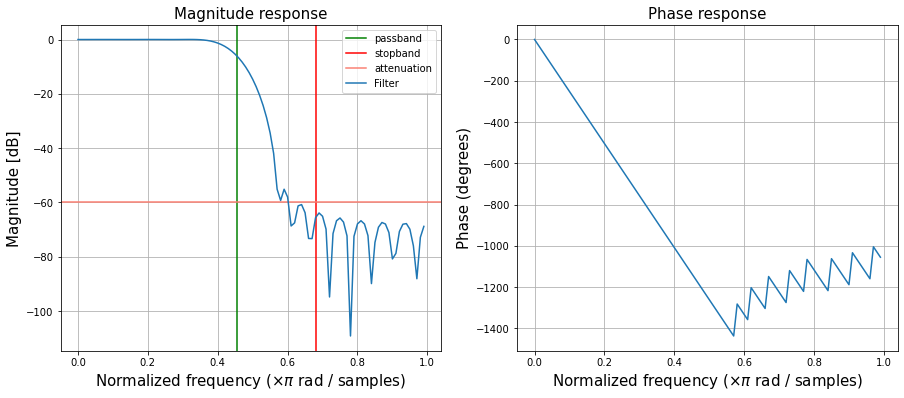

In [35]:
n = 29
fir1 = signal.firwin(numtaps=n, cutoff=passband, width=stopband - passband, pass_zero='lowpass', fs=fs)
fir1 = signal.dlti(fir1, [1] + [0 for i in range(1, len(fir1))])
plot_frequency_response(fir1, passband=passband, stopband=stopband, attenuation=-60, fs=fs)

### fir2

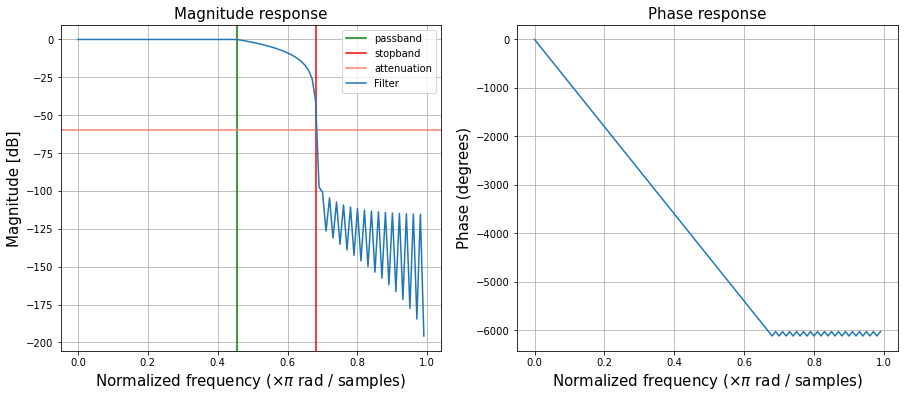

In [36]:
n = 501
fir2 = signal.firwin2(numtaps=n, freq=[0, passband[0], stopband[0], fs/2], gain=[1, 1, 0, 0], fs=fs)
fir2 = signal.dlti(fir2, [1] + [0 for i in range(1, len(fir2))])
plot_frequency_response(fir2, passband=passband, stopband=stopband, attenuation=-60, fs=fs)

# Problem 7
Approximate a filter with frequency response
$$
H(f) = \left\{
\begin{array}{}
exp(-|f|/10^{-7}) & |f| < 2MHz\\
0 & |f| > 4MHz\\
\end{array}
\right.
$$
Let the sampling frequency be $F_s = 20 MHz$, and the attenuation in the stopband be 50dB. Determine the impulse response of a FIR filter, which approximates this frequency response. Plot the frequency response in terms of magnitude and phase to verify that the approximation holds. Provide Matlab code.

In [37]:
fs = 20 * 10**6
passband = np.array([2 * 10**6], dtype=np.float64)
stopband = np.array([4 * 10**6], dtype=np.float64)



bands_in_passband = np.linspace(0, passband[0], num=10)
desired_in_the_passband = np.exp(-np.abs(bands_in_passband) / 10**7)

bands_in_passband /= fs
passband /= fs
stopband /= fs

n = 15
filt = signal.firls(n,
                    bands=np.concatenate([bands_in_passband, stopband, [0.5]]),
                    desired=np.concatenate([desired_in_the_passband, [0, 0]]),
                    fs=1)
filt = signal.dlti(filt, [1] + [0 for i in range(1, len(filt))])

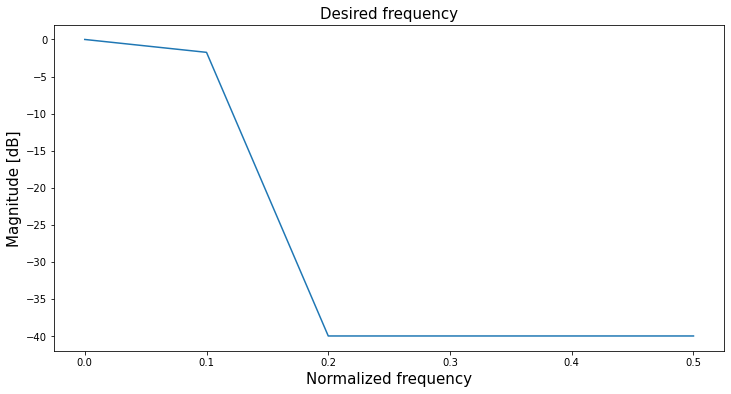

In [38]:
f = np.concatenate([bands_in_passband, stopband, [0.5]])
m = np.concatenate([desired_in_the_passband, [10**-2, 10**-2]])
m = 20 * np.log10(np.abs(m))

plt.figure(figsize=(12, 6))
plt.title('Desired frequency', fontsize=15)
plt.plot(f, m)
plt.xlabel('Normalized frequency', fontsize=15)
plt.ylabel('Magnitude [dB]', fontsize=15)
plt.show()

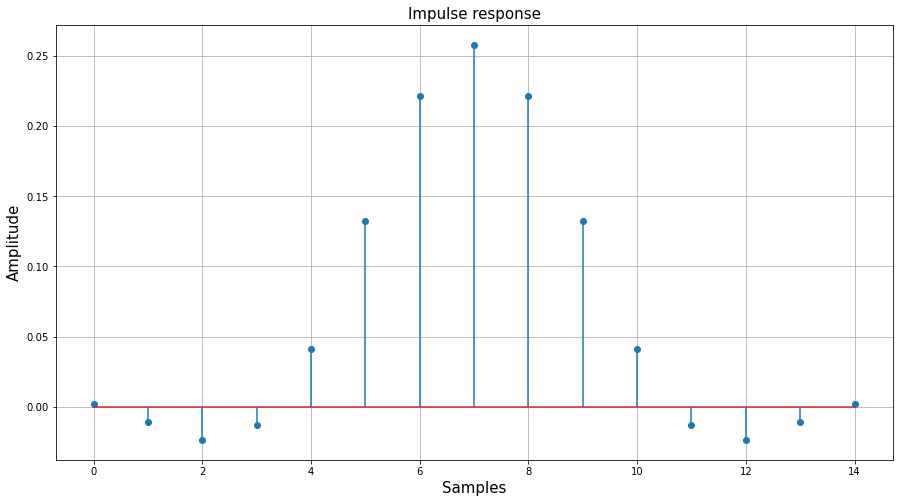

In [39]:
plot_impulse_response(filt, n)

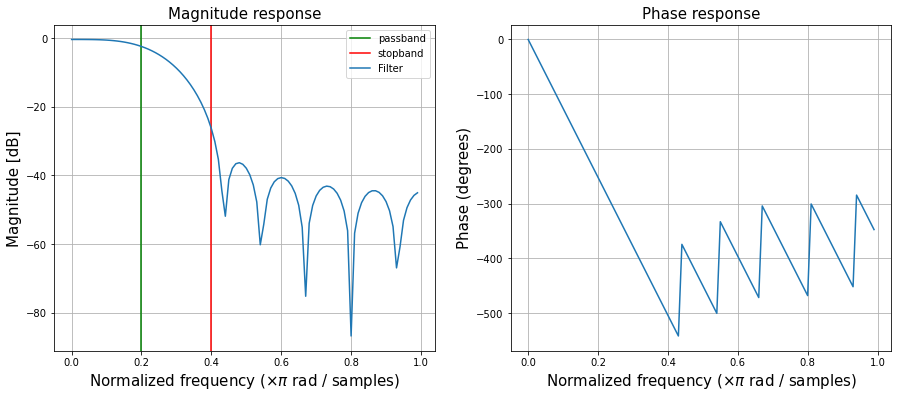

In [40]:
plot_frequency_response(filt, passband=passband, stopband=stopband)

# Problem 8
Using the Bilinear Transformation, calculate Elliptic analog lowpass filter prototype for the following discrete time design:  
a) passband $5MHz$;  
b) stopband $6MHz$;  
c) passband ripple $0.1dB$;  
d) stopband attenuation $50dB$;  
e) sampling frequency $F_s = 18MHz$.  
Plot impulse response and step response for analog and digital systems.  
Plot magnitude response for analog and digital systems. Provide Matlab code.

In [41]:
fs = 18 * 10**6

passband = np.array([5 * 10**6], dtype=np.float64)
stopband = np.array([6 * 10**6], dtype=np.float64)

passband /= fs
stopband /= fs

gpass = 0.1
gstop = 50

analog_system = signal.lti(
    *signal.iirdesign(wp=passband, ws=stopband, gpass=gpass, gstop=gstop, analog=True, ftype='ellip')
)
discrete_system = signal.dlti(*signal.bilinear(analog_system.num, analog_system.den, fs=0.5 / np.pi))

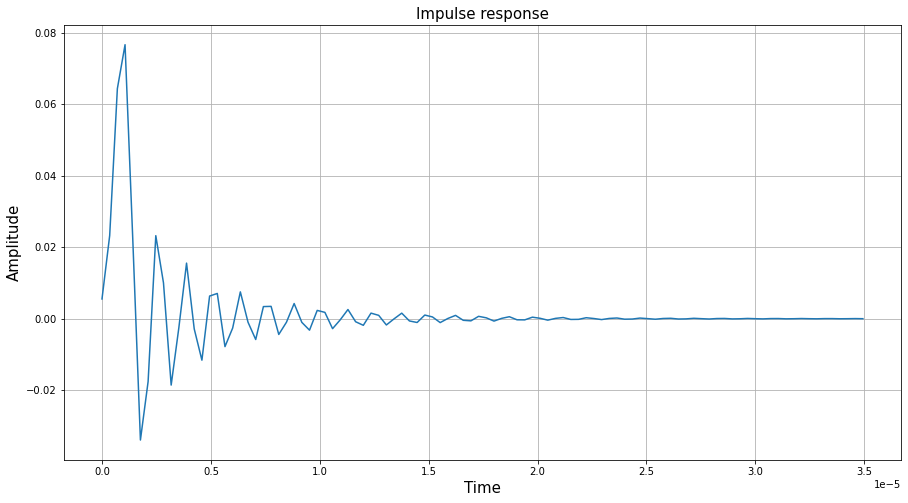

In [42]:
plot_impulse_response(analog_system, unnormal=fs)

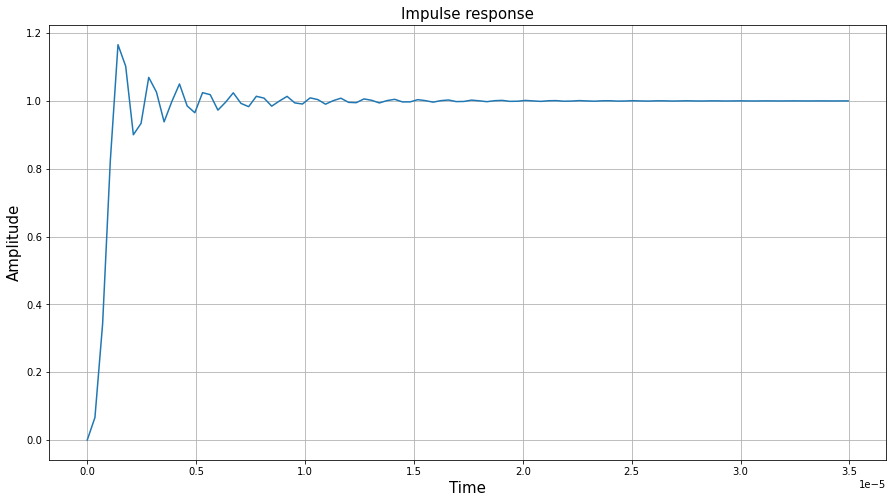

In [43]:
plot_step_response(analog_system, unnormal=fs)

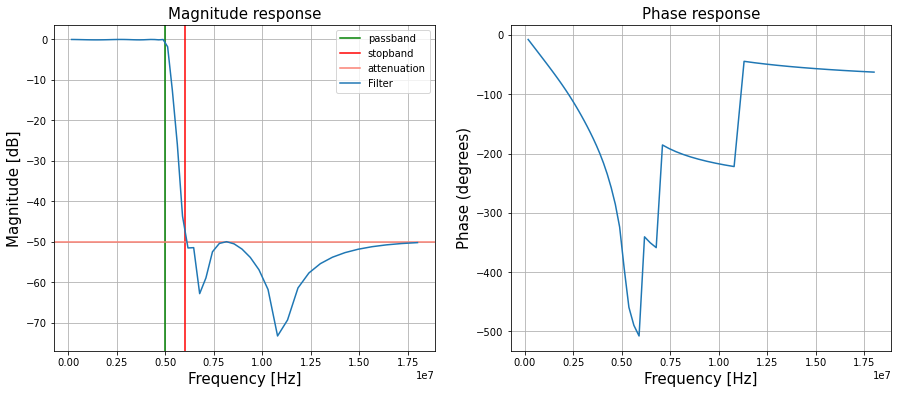

In [44]:
plot_frequency_response(analog_system, passband=passband, stopband=stopband, attenuation=-gstop, unnormal=fs)

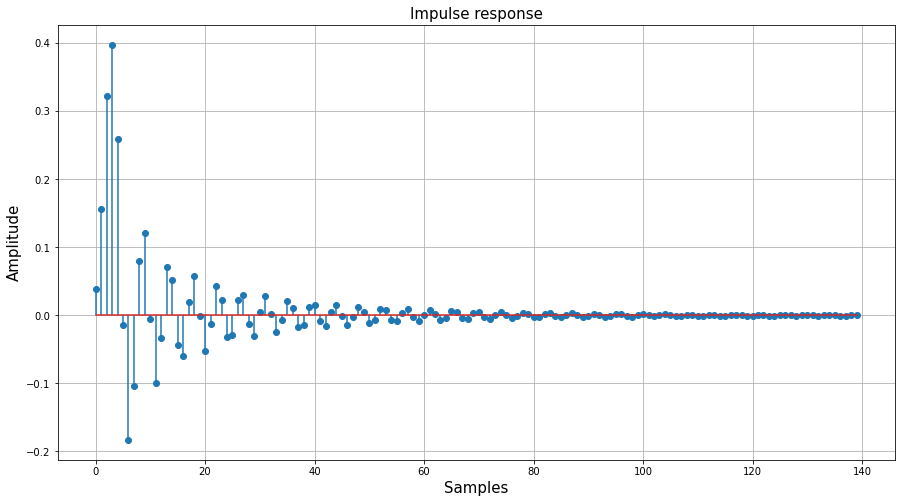

In [45]:
plot_impulse_response(discrete_system, 140)

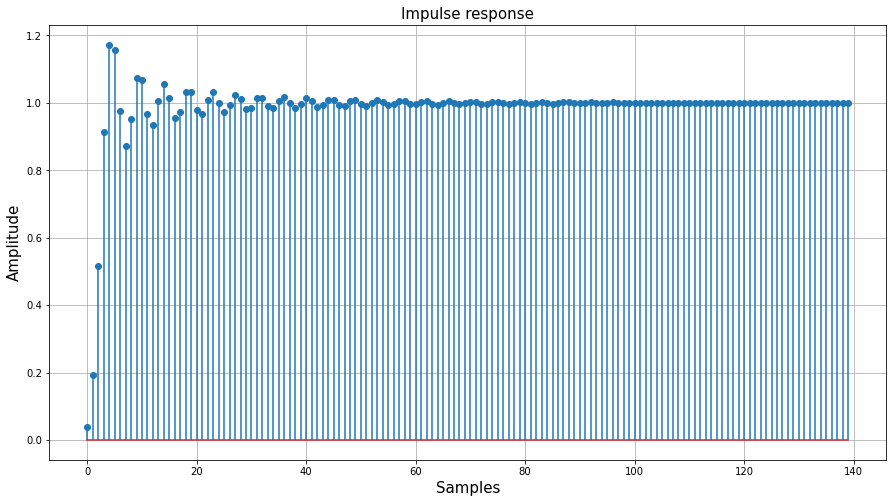

In [46]:
plot_step_response(discrete_system, 140)

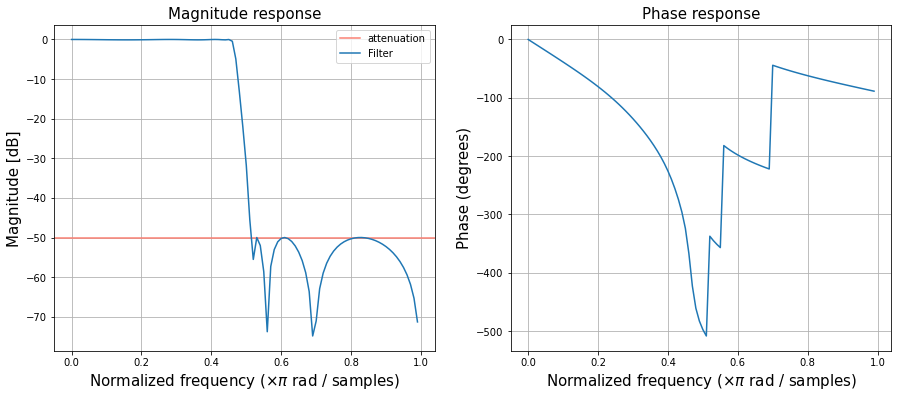

In [47]:
plot_frequency_response(discrete_system, attenuation=-gstop)

# Problem 9
Using the Impulse invariance method for analog to digital filter conversion, calculate Chebyshev analog lowpass filter prototype for the following discrete time design:  
a) passband $10MHz$;  
b) stopband $15MHz$;  
c) passband ripple $0.5dB$;  
d) stopband attenuation $55dB$;  
e) sampling frequency $F_s = 80MHz$.  
Plot impulse response for analog and digital systems.  
Plot magnitude response for analog and digital systems. Provide Matlab code.  

In [48]:
fs = 80 * 10**6

passband = np.array([10 * 10**6], dtype=np.float64)
stopband = np.array([15 * 10**6], dtype=np.float64)

# normalize
passband = passband / fs
stopband = stopband / fs

gpass = 0.5
gstop = 55

analog_system = signal.lti(
    *signal.iirdesign(wp=passband, ws=stopband, gpass=gpass, gstop=gstop, analog=True, ftype='cheby1')
)

In [49]:
def impinvar(analog_system, fs=1.0):
    r, p, k = signal.residue(analog_system.num, analog_system.den)
    rz = r
    kz = k
    pz = np.exp(p * 2 * np.pi / fs)
    num, den = signal.invresz(rz, pz, kz)
    discrete_system = signal.dlti(num, den, dt = 1 / fs)
    return discrete_system

In [50]:
discrete_system = impinvar(analog_system)

/Users/maxkuzn/miniconda3/envs/dsp/lib/python3.8/site-packages/scipy/signal/filter_design.py:1625: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


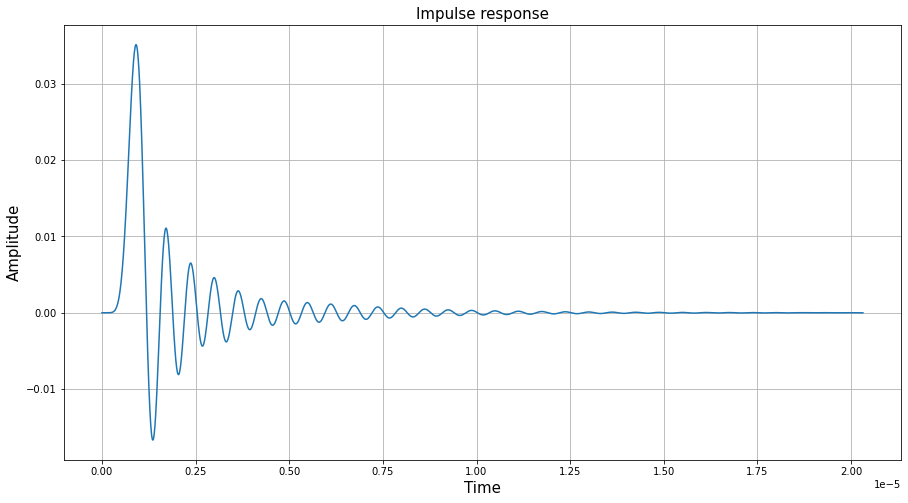

In [51]:
plot_impulse_response(analog_system, unnormal=fs, num=2000)

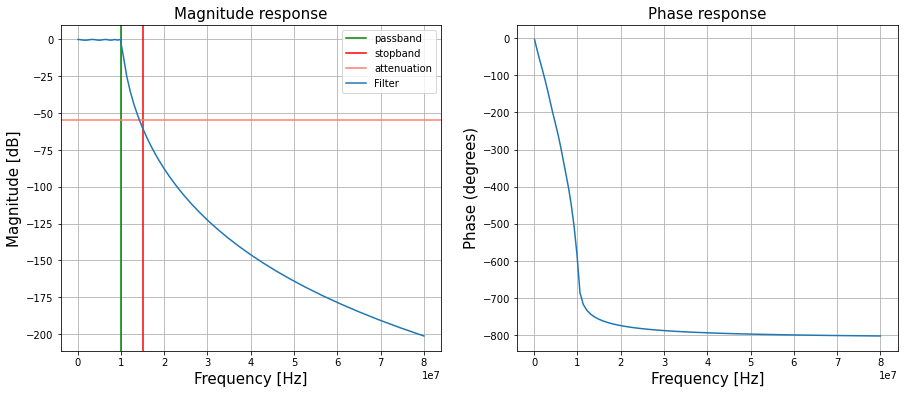

In [52]:
plot_frequency_response(analog_system, passband=passband, stopband=stopband, attenuation=-gstop, unnormal=fs)

/Users/maxkuzn/miniconda3/envs/dsp/lib/python3.8/site-packages/scipy/signal/ltisys.py:3485: ComplexWarning: Casting complex values to real discards the imaginary part
  xout[i+1, :] = (np.dot(system.A, xout[i, :]) +
/Users/maxkuzn/miniconda3/envs/dsp/lib/python3.8/site-packages/scipy/signal/ltisys.py:3487: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[i, :] = (np.dot(system.C, xout[i, :]) +
/Users/maxkuzn/miniconda3/envs/dsp/lib/python3.8/site-packages/scipy/signal/ltisys.py:3491: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[out_samples-1, :] = (np.dot(system.C, xout[out_samples-1, :]) +


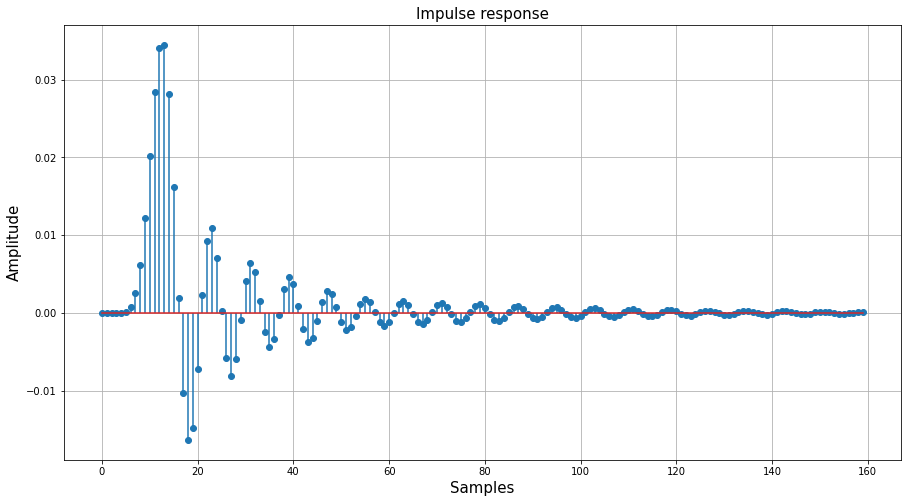

In [53]:
plot_impulse_response(discrete_system, num=160)

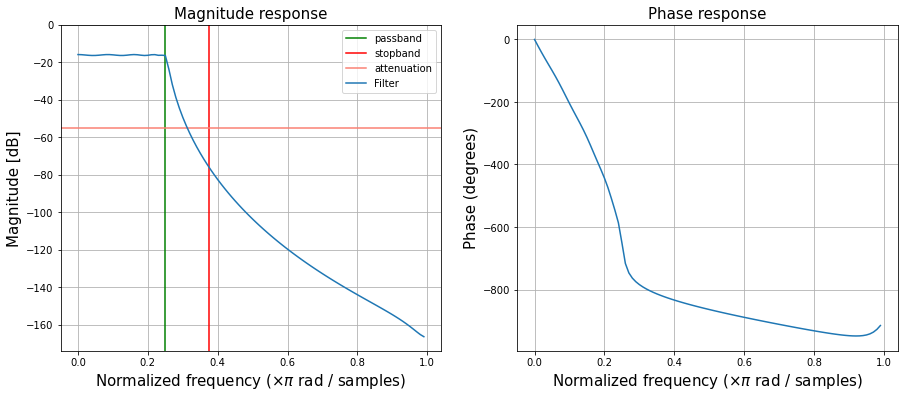

In [54]:
plot_frequency_response(discrete_system, passband=passband, stopband=stopband, attenuation=-gstop, top=0)

# Problem 10
Implement the analog filter with transfer function
$$H(s) = \frac{s + 2.5}{s^2 + 2.5s + 4}$$
by a discrete time approximation, using the Bilinear Transformation. Sample clock frequency is $F_s = 20Hz$.  
a) Determine the Linear Difference Equation of the discrete time implementation  
b) Plot the impulse and frequency responses of the digital filter and the analog filter.  
Provide Matlab code.

# Solution

In Bilinear Transformation approximation we approximate $\large s = \frac{2}{T_s} \cdot \frac{z - 1}{z + 1} = 2F_s\frac{z - 1}{z + 1} = 40\frac{z - 1}{z + 1}$  
$$H(s) = \frac{s + 2.5}{s^2 + 2.5s + 4} \Rightarrow H(z) = \frac{40\frac{z - 1}{z + 1} + 2.5}{(40\frac{z - 1}{z + 1})^2 + 2.5(40 \frac{z - 1}{z + 1}) + 4} = \frac{(z + 1)^2}{(z + 1)^2} \cdot \frac{40\frac{z - 1}{z + 1} + 2.5}{(40\frac{z - 1}{z + 1})^2 + 2.5(40 \frac{z - 1}{z + 1}) + 4} = $$\
$$ = \frac{40(z - 1)(z + 1) + 2.5(z + 1)^2}{1600(z - 1)^2 + 100 (z - 1)(z + 1) + 4(z + 1)^2} = \frac{40(z^2 - 1) + 2.5(z^2 + 2z + 1)}{1600(z^2 - 2z + 1) + 100(z^2 - 1) + 4(z^2 + 2z + 1)} = $$\
$$ = \frac{(40 + 2.5)z^2 + 5z + (-40 + 2.5)}{(1600 + 100 + 4)z^2 + (-3200 + 8)z + (1600 - 100 + 4)} = \frac{42.5z^2 + 5z - 37.5}{1704z^2 - 3192z + 1504} = \frac{42.5 + 5z^{-1} - 37.5z^{-2}}{1704 - 3192z^{-1} + 1504z^{-2}} = $$\
$$ = \frac{\frac{85}{2} + 5z^{-1} - \frac{75}{2}z^{-2}}{1704 - 3192z^{-1} + 1504z^{-2}} =  \frac{\frac{85}{3408} + \frac{5}{1704}z^{-1} - \frac{75}{3408}z^{-2}}{1 - \frac{3192}{1704}z^{-1} + \frac{1504}{1704}z^{-2}} = $$\
$$ = \frac{\frac{85}{3408} + \frac{5}{1704}z^{-1} - \frac{25}{1136}z^{-2}}{1 - \frac{133}{71}z^{-1} + \frac{188}{213}z^{-2}}$$

#### a) Determine the Linear Difference Equation of the discrete time implementation
So, from $H(z) = \frac{Y(z)}{X(z)}$ we get:  
$\large y[n] = \frac{133}{71}y[n - 1] - \frac{188}{213}y[n - 2] + \frac{85}{3408}x[n] + \frac{5}{1704} x[n - 1] - \frac{25}{1136}x[n - 2]$

#### b) Plot the impulse and frequency responses of the digital filter and the analog filter.  


In [55]:
num = [1, 2.5]
den = [1, 2.5, 4]
analog_system = signal.lti(num, den)

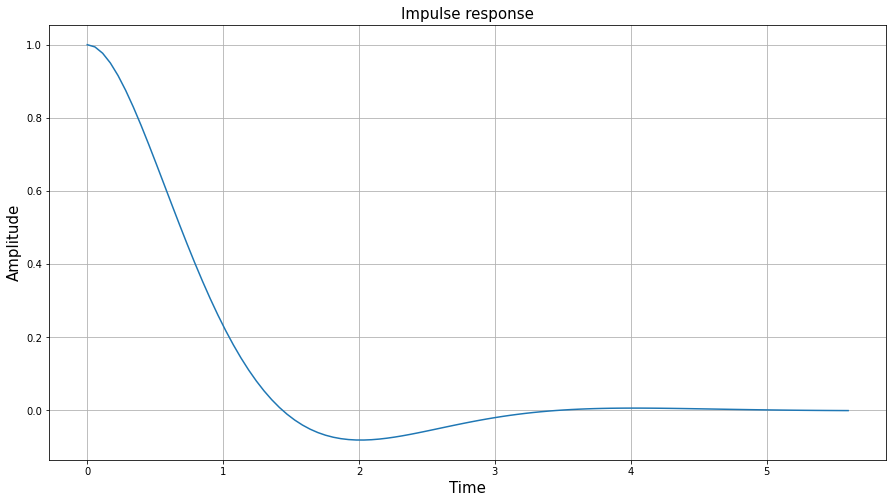

In [56]:
plot_impulse_response(analog_system)

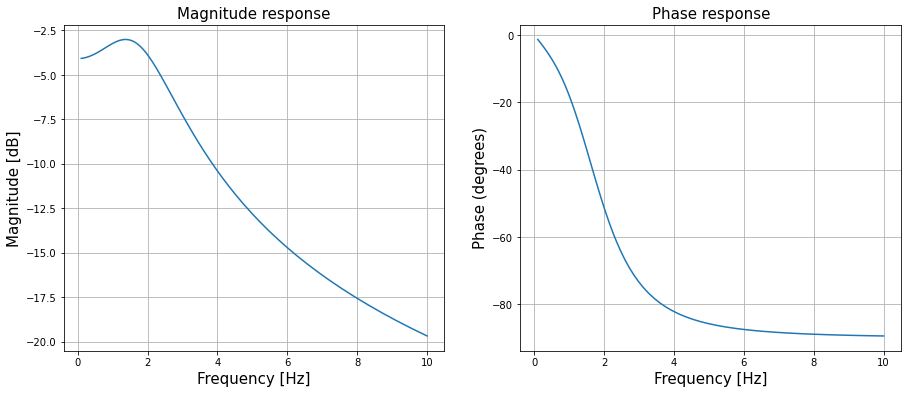

In [57]:
plot_frequency_response(analog_system)

In [58]:
Fs = 20
discrete_system = signal.dlti(*signal.bilinear(analog_system.num, analog_system.den, fs=Fs))

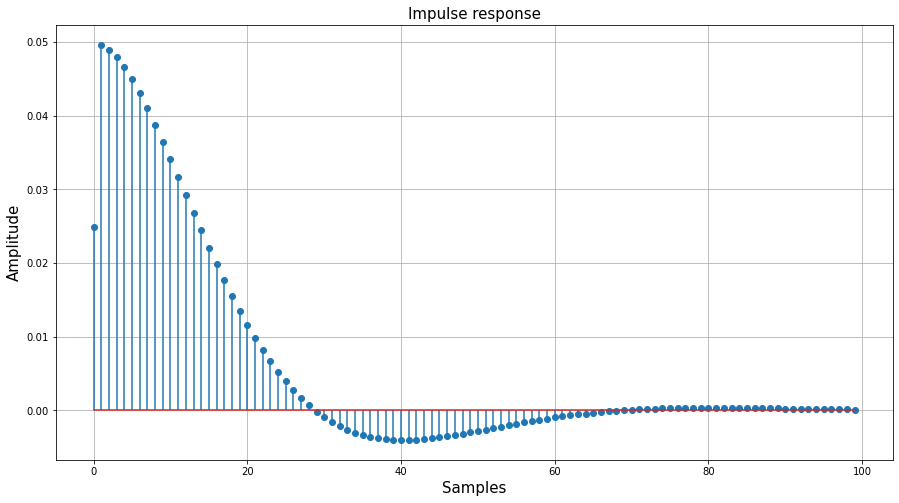

In [59]:
plot_impulse_response(discrete_system)

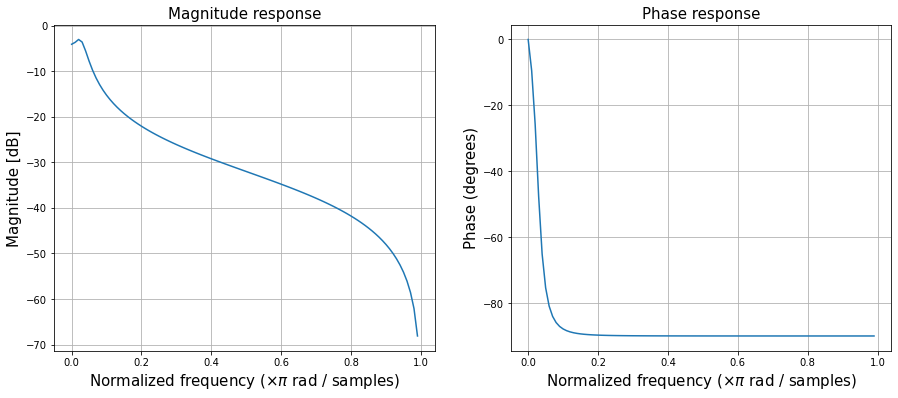

In [60]:
plot_frequency_response(discrete_system)

# Problem 11
An integrator has transfer function
$$H(s) = \frac{s}{5}$$
a) Determine a discrete time implementation using Euler's approximation, with sampling frequency $F_s = 12Hz$.  
Plot the frequency response, and verify that it approximates the integrator for low frequencies.  
  
b) Determine a discrete time implementation using Bilinear Transformation approximation, with sampling frequency $F_s = 24Hz$.  
Plot the frequency response, and verify that it approximates the integrator for low frequencies.  
  
Compare results. Plot impulse and frequency response. Provide Matlab code.

## Solution
#### a) Determine a discrete time implementation using Euler's approximation, with sampling frequency Fs = 12Hz.

In Euler's approximation we approximate $\large s = \frac{1 - z^{-1}}{T_s} = F_s(1 - z^{-1}) = 12(1 - z^{-1})$  
$$H(s) = \frac{s}{5} \Rightarrow H(z) = \frac{Y(z)}{X(z)} = \frac{12}{5}(1 - z^{-1})$$
$$Y(z) = \frac{12}{5}(1 - z^{-1})X(z)$$
$$y[n] = \frac{12}{5}(x[n] - x[n - 1])$$

#### Plot the frequency response, and verify that it approximates the integrator for low frequencies.

In [61]:
num = [12 / 5, -12 / 5]
den = [1, 0]
system = signal.dlti(num, den)

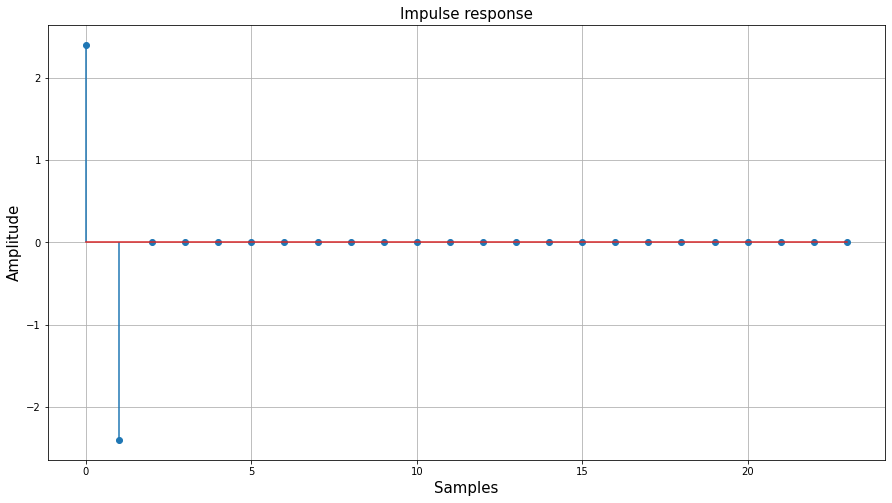

In [62]:
plot_impulse_response(system, 24)

/Users/maxkuzn/miniconda3/envs/dsp/lib/python3.8/site-packages/scipy/signal/ltisys.py:3837: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


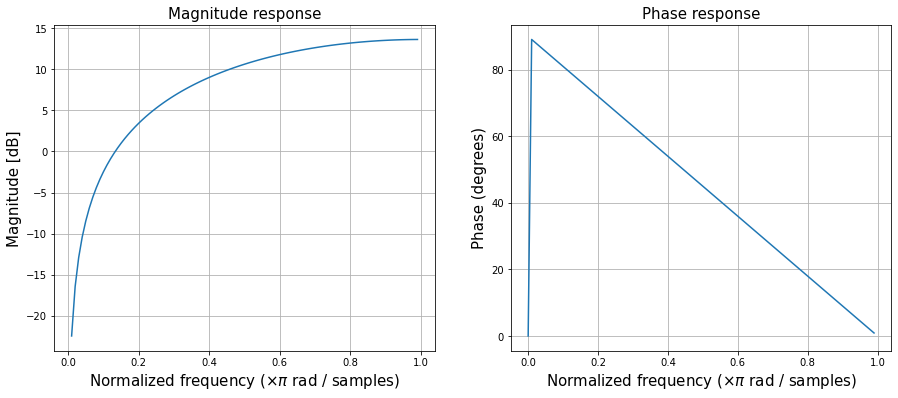

In [63]:
plot_frequency_response(system)

## Solution
#### b) Determine a discrete time implementation using Bilinear Transformation approximation, with sampling frequency $F_s = 24Hz$. 

In Bilinear Transformation approximation we approximate $\large s = \frac{2}{T_s} \cdot \frac{z - 1}{z + 1} = 2F_s\frac{1 - z^{-1}}{1 + z^{-1}} = 48\frac{1 - z^{-1}}{1 + z^{-1}}$  
$$H(s) = \frac{s}{5} \Rightarrow H(z) = \frac{Y(z)}{X(z)} = \frac{48}{5} \cdot \frac{1 - z^{-1}}{1 + z^{-1}}$$\
$$Y(z)(1 + z^{-1}) = \frac{48}{5} X(z)(1 - z^{-1})$$\
$$y[n] + y[n - 1] = \frac{48}{5}x[n] - \frac{48}{5}x[n - 1]$$\
$$y[n] =  -y[n - 1] + \frac{48}{5}x[n] - \frac{48}{5}x[n - 1]$$

#### Plot the frequency response, and verify that it approximates the integrator for low frequencies.  

In [64]:
num = [48 / 5, -48 / 5]
den = [1, 1]
system = signal.dlti(num, den)

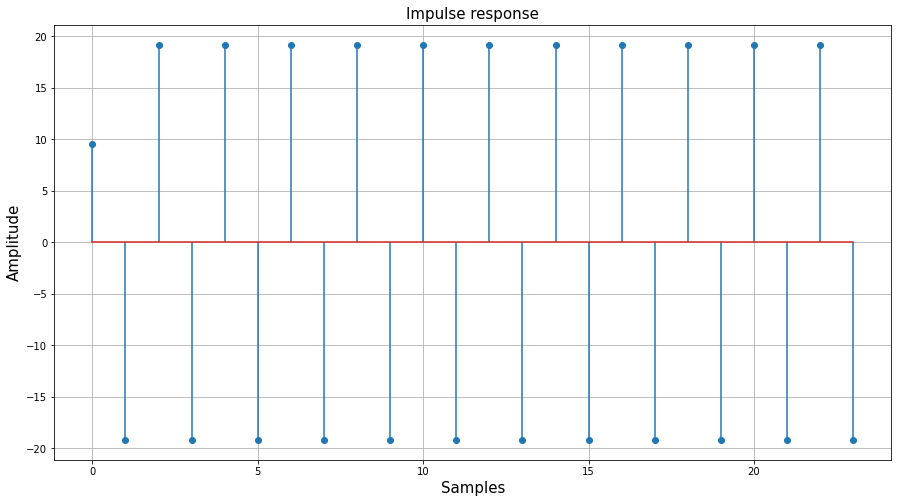

In [66]:
plot_impulse_response(system, 24)

/Users/maxkuzn/miniconda3/envs/dsp/lib/python3.8/site-packages/scipy/signal/ltisys.py:3837: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


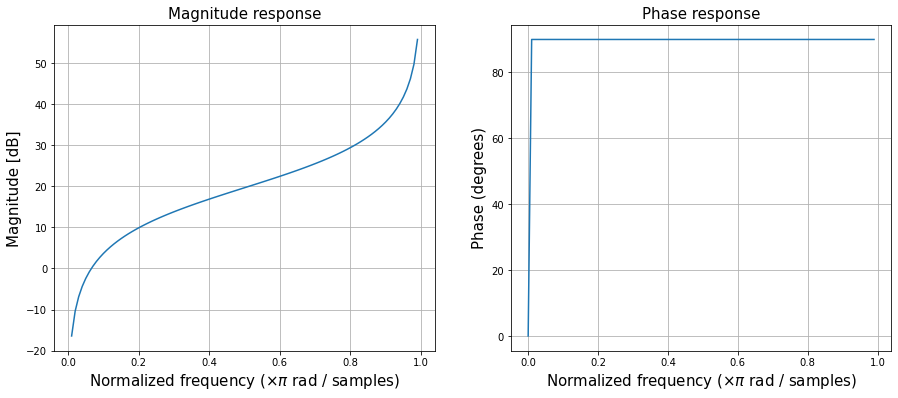

In [67]:
plot_frequency_response(system)

# Problem 12
An FIR Filter has transfer function
$$ H(z) = 3 + 4z^{-1} + 6z^{-2} + 8z^{-3}$$
Determine the Impulse Response of the filter with the modified frequency
response $F(\omega) = H(\omega - \pi / 6)$.

# Solution

$$ H(z) = 3 + 4z^{-1} + 6z^{-2} + 8z^{-3}$$

$$ H(\omega) = 3 + 4e^{-j\omega} + 6e^{-2j\omega} + 8e^{-3j\omega}$$

$$F(\omega) = H(\omega - \frac{\pi}{6}) = 3 + 4e^{-j(\omega - \frac{\pi}{6})} + 6e^{-2j(\omega - \frac{\pi}{6})} + 8e^{-3j(\omega - \frac{\pi}{6})} = $$
$$ = 3 + 4e^{-j\omega}e^{j\frac{\pi}{6}} + 6e^{-2j\omega}e^{j\frac{\pi}{3}} + 8e^{-3j\omega}e^{j\frac{\pi}{2}} = $$
$$ = 3 + 4e^{-j\omega}(\frac{\sqrt{3}}{2} + \frac{1}{2}j) + 6e^{-2j\omega}(\frac{1}{2} + \frac{\sqrt{3}}{2}j) + 8e^{-3j\omega}j$$

$$h[n] =  3\delta[n] + 4\delta[n-1](\frac{\sqrt{3}}{2} + \frac{1}{2}j) + 6\delta[n-2](\frac{1}{2} + \frac{\sqrt{3}}{2}j) + 8\delta[n-3]j$$

# Problem 13
A digital filter is defined by the transfer function:
$$ H(z) = \frac{2 - 3.5z^{-1} - 4.5z^{-2}}{2 - 1.5z^{-1} - 3.5z^{-2}}$$
Draw the block diagram representation of the filter in Direct-Form 1 and Direct-
Form 2. Plot impulse and frequency responses. Provide Matlab code.

## Solution

$$H(z) = \frac{Y(z)}{X(z)} = \frac{2 - 3.5z^{-1} - 4.5z^{-2}}{2 - 1.5z^{-1} - 3.5z^{-2}} = \frac{1 - 1.75z^{-1} - 2.25z^{-2}}{1 - 0.75z^{-1} - 1.75z^{-2}}$$
$$Y(z)(1 - 0.75z^{-1} - 1.75z^{-2}) = X(z)(1 - 1.75z^{-1} - 2.25z^{-2})$$
$$y[n] - 0.75y[n - 1] - 1.75y[n - 2] = x[n] - 1.75x[n - 1] - 2.25x[n - 2]$$\
$$y[n] = 0.75y[n - 1] + 1.75y[n - 2] + x[n] - 1.75x[n - 1] - 2.25x[n - 2]$$

#### Draw the block diagram representation of the filter in Direct-Form 1
Direct Form 1 using D notation:
![Direct Form 1 using D notation](13-1.png)

#### Draw the block diagram representation of the filter in Direct-Form 2
Direct Form 2 using D notation:
![Direct Form 2 using D notation](13-2.png)

#### Plot impulse and frequency responses.

In [73]:
num = [2, -3.5, -4.5]
den = [2, -1.5, -3.5]
system = signal.dlti(num, den)

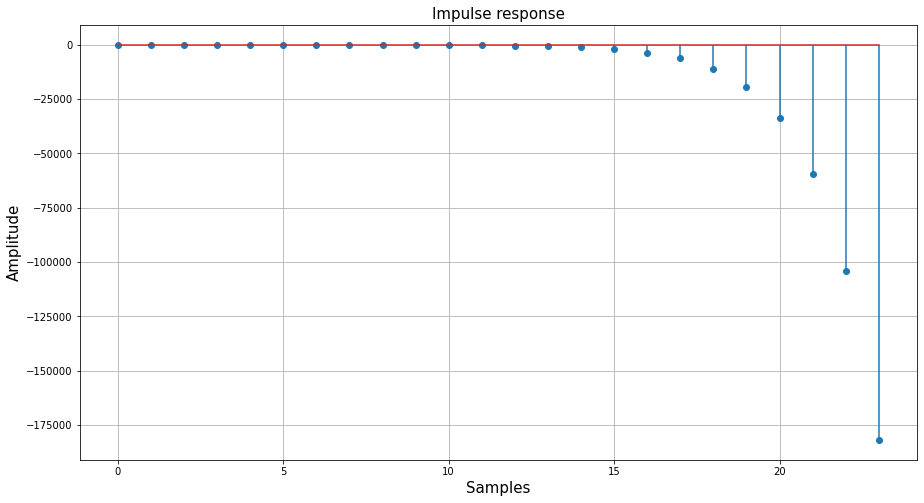

In [74]:
plot_impulse_response(system, 24)

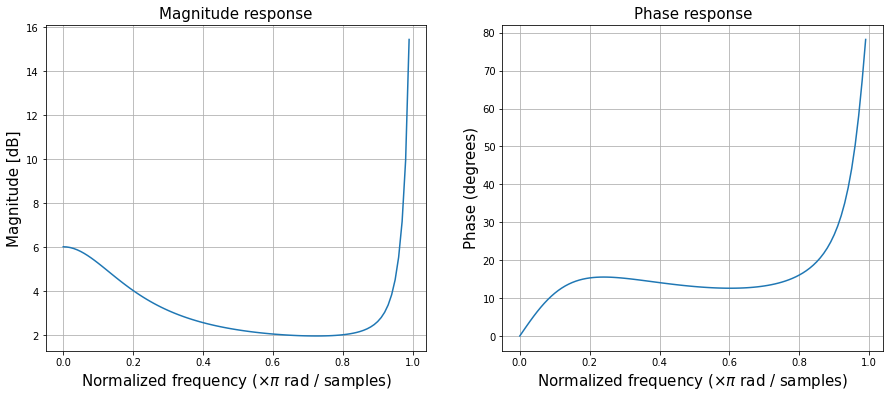

In [75]:
plot_frequency_response(system)

# Problem 14
For the system with transfer function
$$H(z) = \frac{2z + 4}{2z^3 + 4z^2 + z + 2}$$
a) Calculate difference equation relating the input $x[n]$ to the output $y[n]$  
  
b) Design a block diagram realization (Direct Form I)  
  
c) Plot impulse and frequency responses  
  
Plot impulse and frequency response. Provide Matlab code.

## Solution

#### a) Calculate difference equation relating the input $x[n]$ to the output $y[n]$  

$$H(z) = \frac{Y(z)}{X(z)} = \frac{2z + 4}{2z^3 + 4z^2 + z + 2} = \frac{\frac{1}{2}z^{-3}}{\frac{1}{2}z^{-3}} \cdot \frac{2z + 4}{2z^3 + 4z^2 + z + 2} = \frac{z^{-2} + 2z^{-3}}{1 + 2z^{-1} + \frac{1}{2}z^{-2} + z^{-3}}$$
$$Y(z)(1 + 2z^{-1} + \frac{1}{2}z^{-2} + z^{-3}) = X(z)(z^{-2} + 2z^{-3})$$
$$y[n] + 2y[n - 1] + \frac{1}{2}y[n - 2] + y[n - 3] = x[n - 2] + 2x[n - 3]$$\
$$y[n] = -2y[n - 1] - \frac{1}{2}y[n - 2] - y[n - 3] + x[n - 2] + 2x[n - 3]$$

#### b) Design a block diagram realization (Direct Form I)  
Direct Form I using D notation:
![Direct Form I using D notation](14.png)

#### c) Plot impulse and frequency responses  

In [76]:
num = [2, 4]
den = [2, 4, 1, 2]
system = signal.dlti(num, den)

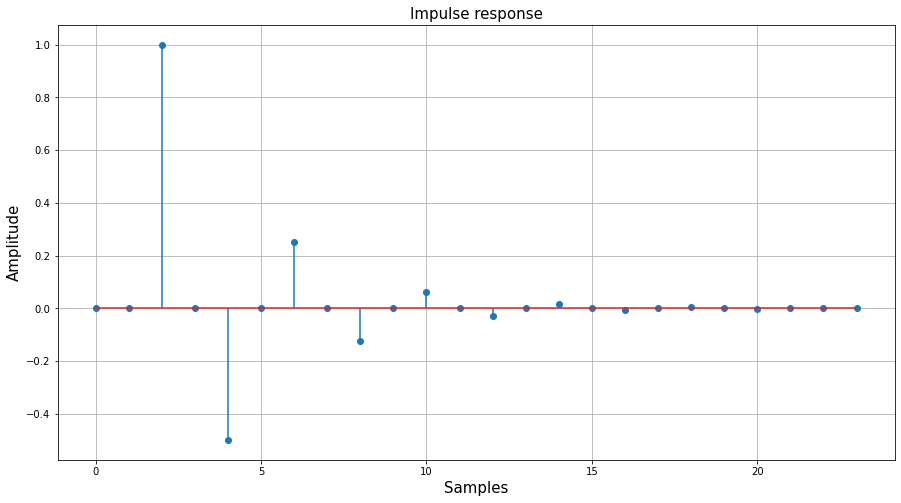

In [77]:
plot_impulse_response(system, 24)

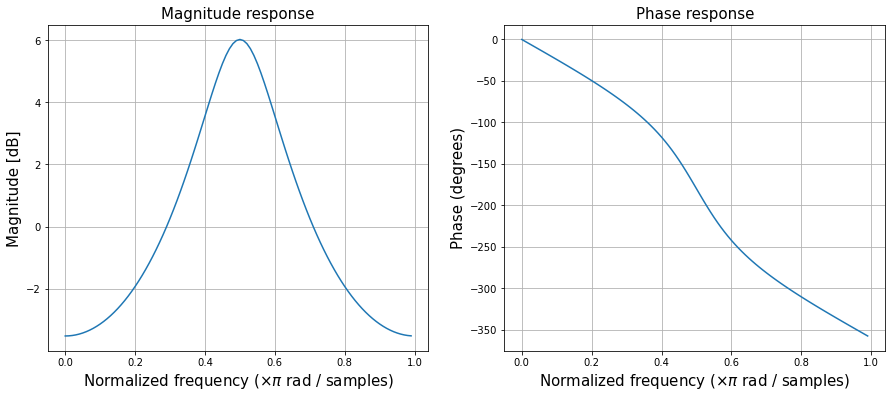

In [78]:
plot_frequency_response(system)

# Problem 15
In the DAC we want to use a linear interpolation between samples instead of standard Sample and Hold, as shown in the figure below. This is a First Order Hold reconstructor.

![title](15.png)

a) Show that $\large x(t) = \sum\limits_{n = -\infty}^{\infty} x[n]g(t - nT_s)$ , where $g(t)$ is the triangle pulse  
  
b) Calculate frequency response of DAC output, considering that $x(t)$ is the band-limited white noise with a bandwidth is much lower than $F_s$  
  
c) Show the difference between Sample and Hold and First Order Hold. Plot impulse and frequency responses. Provide Matlab code.

# Solution

#### a) Show that $\large x(t) = \sum\limits_{n = -\infty}^{\infty} x[n]g(t - nT_s)$ , where $g(t)$ is the triangle pulse  
For any $t = kT_s$:  
$g(t) = \sum\limits_{n = -\infty}^{\infty} x[n]g(t - nT_s) = \sum\limits_{n = -\infty}^{\infty} x[n]g(kTs - nT_s) = x[k]g(0) = x[k]$  
  
For $\alpha < 1$: $g(\alpha T_s) = 1 - \alpha$  
Let's consider point $t = \alpha kT_s + (1 - \alpha) (k + 1) T_s$:  
$x(t) = \sum\limits_{n = -\infty}^{\infty} x[n]g(t - nT_s) = \sum\limits_{n = -\infty}^{\infty} x[n]g(\alpha kT_s + (1 - \alpha)(k + 1)T_s - nT_s) =$  
$ = x[k]g(\alpha kT_s + (1 - \alpha )(k + 1)T_s - kT_s) + x[k + 1]g(\alpha kT_s + (1 - \alpha )(k + 1)T_s - (k + 1)T_s) =$  
$ = x[k]g(-(1 - \alpha) kT_s + (1 - \alpha )(k + 1)T_s) + x[k + 1]g(\alpha kT_s - \alpha(k + 1)T_s) =$  
$ = x[k]g((1 - \alpha )T_s) + x[k + 1]g(- \alpha T_s) = x[k] \alpha + x[k + 1](1 - \alpha)$ - linear interpolation, as we wanted


In [79]:
import numpy as np

def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

In [80]:
Ts = 16
Fs = 1 / Ts
n = 512 + 1
x = np.arange(n)
noise = band_limited_noise(min_freq=0, max_freq=Fs / 10, samples=n)

In [81]:
x_sampled = x[::Ts]
sampled = noise[::Ts]

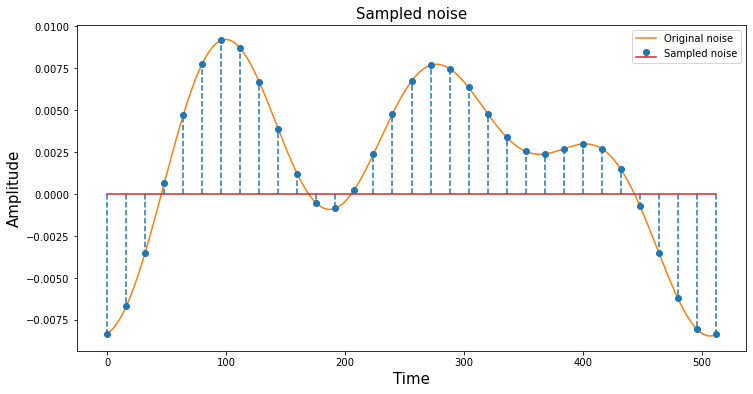

In [82]:
plt.figure(figsize=(12, 6))

plt.plot(x, noise, color='C1', label='Original noise')
plt.stem(x_sampled, sampled, linefmt='C0--', label='Sampled noise')

plt.title('Sampled noise', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.legend()
plt.show()

In [83]:
def sample_and_hold(x, y, hx):
    hy = np.empty(hx.shape, dtype=y.dtype)
    hy[hx < x[0]] = y[0]
    for i in range(len(x) - 1):
        mask = np.logical_and(x[i] <= hx, hx < x[i + 1])
        hy[mask] = y[i]
    hy[hx >= x[-1]] = y[-1]
    return hy

In [84]:
zero = sample_and_hold(x_sampled, sampled, x)

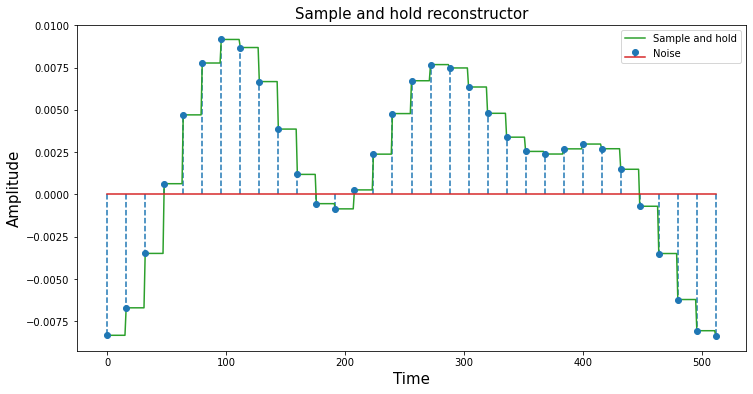

In [85]:
plt.figure(figsize=(12, 6))


plt.plot(x, zero, color='C2', label='Sample and hold')
plt.stem(x_sampled, sampled, linefmt='C0--', label='Noise')

plt.title('Sample and hold reconstructor', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.legend()
plt.show()

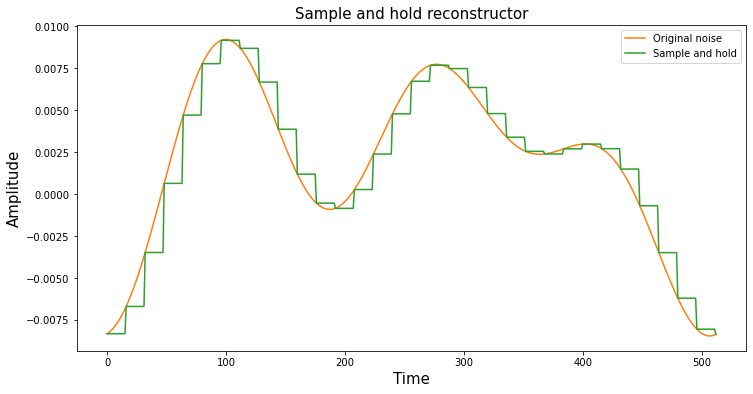

In [86]:
plt.figure(figsize=(12, 6))

plt.plot(x, noise, color='C1', label='Original noise')
plt.plot(x, zero, color='C2', label='Sample and hold')
# plt.stem(x_sampled, sampled, linefmt='C0--', label='Noise')

plt.title('Sample and hold reconstructor', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.legend()
plt.show()

In [87]:
def first_order_hold(x, y, hx):
    hy = np.empty(hx.shape, dtype=y.dtype)
    hy[hx < x[0]] = y[0]
    for i in range(len(x) - 1):
        mask = np.logical_and(x[i] <= hx, hx < x[i + 1])
        alpha = (hx[mask] - x[i]) / (x[i + 1] - x[i])
        hy[mask] = y[i] * (1 - alpha) + y[i + 1] * alpha
    hy[hx >= x[-1]] = y[-1]
    return hy

In [88]:
first = first_order_hold(x_sampled, sampled, x)

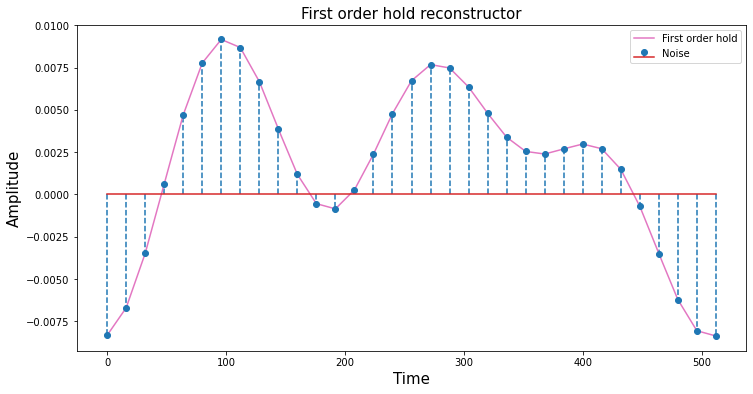

In [89]:
plt.figure(figsize=(12, 6))


plt.plot(x, first, color='C6', label='First order hold')
plt.stem(x_sampled, sampled, linefmt='C0--', label='Noise')

plt.title('First order hold reconstructor', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.legend()
plt.show()

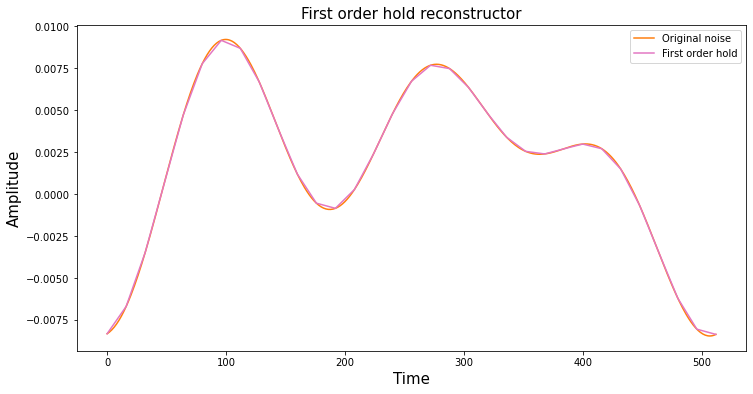

In [90]:
plt.figure(figsize=(12, 6))

plt.plot(x, noise, color='C1', label='Original noise')
plt.plot(x, first, color='C6', label='First order hold')
# plt.stem(x_sampled, sampled, linefmt='C0--', label='Noise')

plt.title('First order hold reconstructor', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.legend()
plt.show()

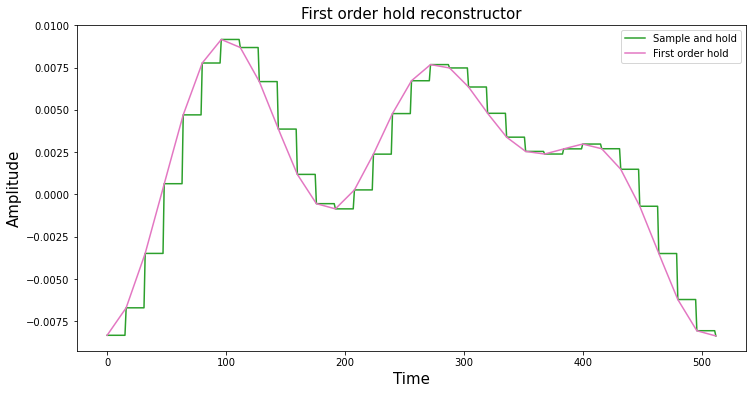

In [91]:
plt.figure(figsize=(12, 6))

plt.plot(x, zero, color='C2', label='Sample and hold')
plt.plot(x, first, color='C6', label='First order hold')
# plt.stem(x_sampled, sampled, linefmt='C0--', label='Noise')

plt.title('First order hold reconstructor', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.legend()
plt.show()

In [92]:
sampled_lti = signal.dlti(sampled, [1] + [0] * (len(sampled) - 1))
noise_lti   = signal.lti( noise,   [1] + [0] * (len(noise)   - 1))
zero_lti    = signal.lti( zero,    [1] + [0] * (len(zero)    - 1))
first_lti   = signal.lti( first,   [1] + [0] * (len(first)   - 1))

### Impulse and frequency response of an sample and hold reconstruction

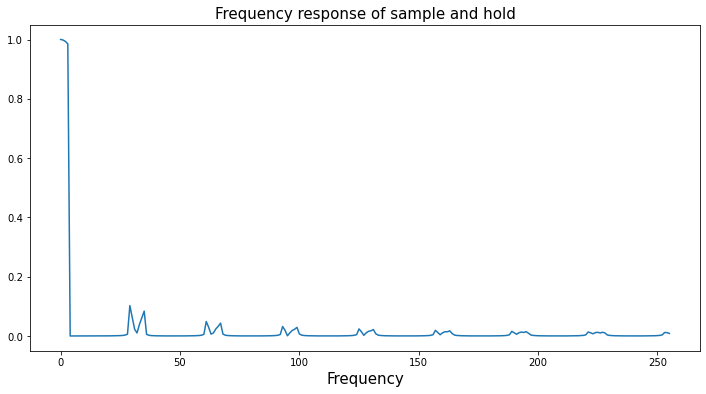

In [93]:
zero_h = np.abs(np.fft.fft(zero))

plt.figure(figsize=(12, 6))
           
plt.title('Frequency response of sample and hold', fontsize=15)
plt.plot(zero_h[:len(zero_h) // 2])
plt.xlabel('Frequency', fontsize=15)

plt.show()

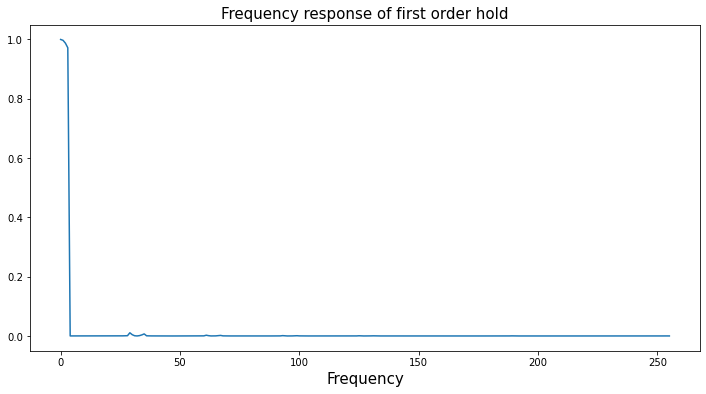

In [94]:
first_h = np.abs(np.fft.fft(first))

plt.figure(figsize=(12, 6))
           
plt.title('Frequency response of first order hold', fontsize=15)
plt.plot(first_h[:len(first_h) // 2])
plt.xlabel('Frequency', fontsize=15)

plt.show()